# Question - 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from ClfAutoEDA import *
import sweetviz as sw

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [250]:
df=pd.read_csv('cubic_zirconia.csv')

In [251]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

## Understanding the Data

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


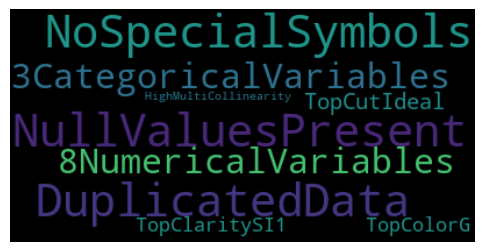

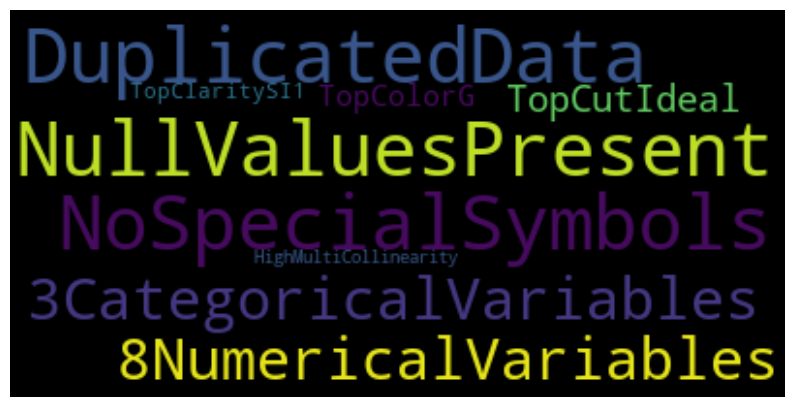

In [253]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

### Missing values present in depth column, categorical information present in cut, color and clarity variables

In [254]:
df.describe(include='all')

Unnamed: 0         carat    cut  color clarity         depth  \
count   26967.000000  26967.000000  26967  26967   26967  26270.000000   
unique           NaN           NaN      5      7       8           NaN   
top              NaN           NaN  Ideal      G     SI1           NaN   
freq             NaN           NaN  10816   5661    6571           NaN   
mean    13484.000000      0.798375    NaN    NaN     NaN     61.745147   
std      7784.846691      0.477745    NaN    NaN     NaN      1.412860   
min         1.000000      0.200000    NaN    NaN     NaN     50.800000   
25%      6742.500000      0.400000    NaN    NaN     NaN     61.000000   
50%     13484.000000      0.700000    NaN    NaN     NaN     61.800000   
75%     20225.500000      1.050000    NaN    NaN     NaN     62.500000   
max     26967.000000      4.500000    NaN    NaN     NaN     73.600000   

               table             x             y             z         price  
count   26967.000000  26967.000000  26967.000000  26967.000000  26967.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean       57.456080      5.729854      5.733569      3.538057   3939.518115  
std         2.232068      1.128516      1.166058      0.720624   4024.864666  
min        49.000000      0.000000      0.000000      0.000000    326.000000  
25%        56.000000      4.710000      4.710000      2.900000    945.000000  
50%        57.000000      5.690000      5.710000      3.520000   2375.000000  
75%        59.000000      6.550000      6.540000      4.040000   5360.000000  
max        79.000000     10.230000     58.900000     31.800000  18818.000000

### Dropping Unnamed: 0 column

In [255]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [256]:
df[df.duplicated()]

carat        cut color clarity  depth  table     x     y     z  price
4756    0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
6215    0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.00   2130
8144    0.33      Ideal     G     VS1   62.1   55.0  4.46  4.43  2.76    854
8919    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
9818    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
10473   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
10500   1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
12894   1.21    Premium     D     SI2   62.5   57.0  6.79  6.71  4.22   6505
13547   0.43      Ideal     G     VS1   61.9   55.0  4.84  4.86  3.00    943
13783   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
14389   0.60    Premium     D     SI2   62.0   57.0  5.43  5.35  3.34   1196
14410   1.00  Very Good     D     SI1   63.1   56.0  6.34  6.30  3.99   5645
15798   0.90  Very Good     I     VS2   58.4   62.0  6.29  6.35  3.69   3334
16852   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
17263   1.04    Premium     I     SI2   62.0   57.0  6.53  6.47  4.03   3774
18025   1.51       Good     I     SI1   63.8   57.0  7.21  7.18  4.59   6046
18777   0.32    Premium     H     VS2   60.6   58.0  4.47  4.44  2.70    648
18837   1.01    Premium     H     VS1   61.2   61.0  6.44  6.41  3.93   5294
19731   0.30       Good     J     VS1   63.4   57.0  4.23  4.26  2.69    394
19877   2.01    Premium     I     VS2   60.3   62.0  8.13  8.08  4.89  15939
20301   0.30      Ideal     H     SI1   62.2   57.0  4.26  4.29  2.66    450
20760   1.80      Ideal     H     VS1   62.3   56.0  7.79  7.76  4.84  15105
22322   2.05    Premium     I     SI2   62.0   58.0  8.13  8.08  5.02   9850
22488   2.42    Premium     J     VS2   61.3   59.0  8.61  8.58  5.27  17168
22583   0.33      Ideal     F      IF   61.2   56.0  4.47  4.49  2.74   1240
23458   2.66       Good     H     SI2   63.8   57.0  8.71  8.65  5.54  16239
23564   1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
24351   2.50       Fair     H     SI2   64.9   58.0  8.46  8.43  5.48  13278
24816   1.50       Good     G     SI2   57.5   63.0  7.53  7.49  4.32   6006
25268   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25759   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25941   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26191   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26530   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

In [257]:
df.drop_duplicates(inplace=True)

In [258]:
df.shape

(26933, 10)

## Outlier Analysis

Box plot before Outliers Treatment (26933, 10)


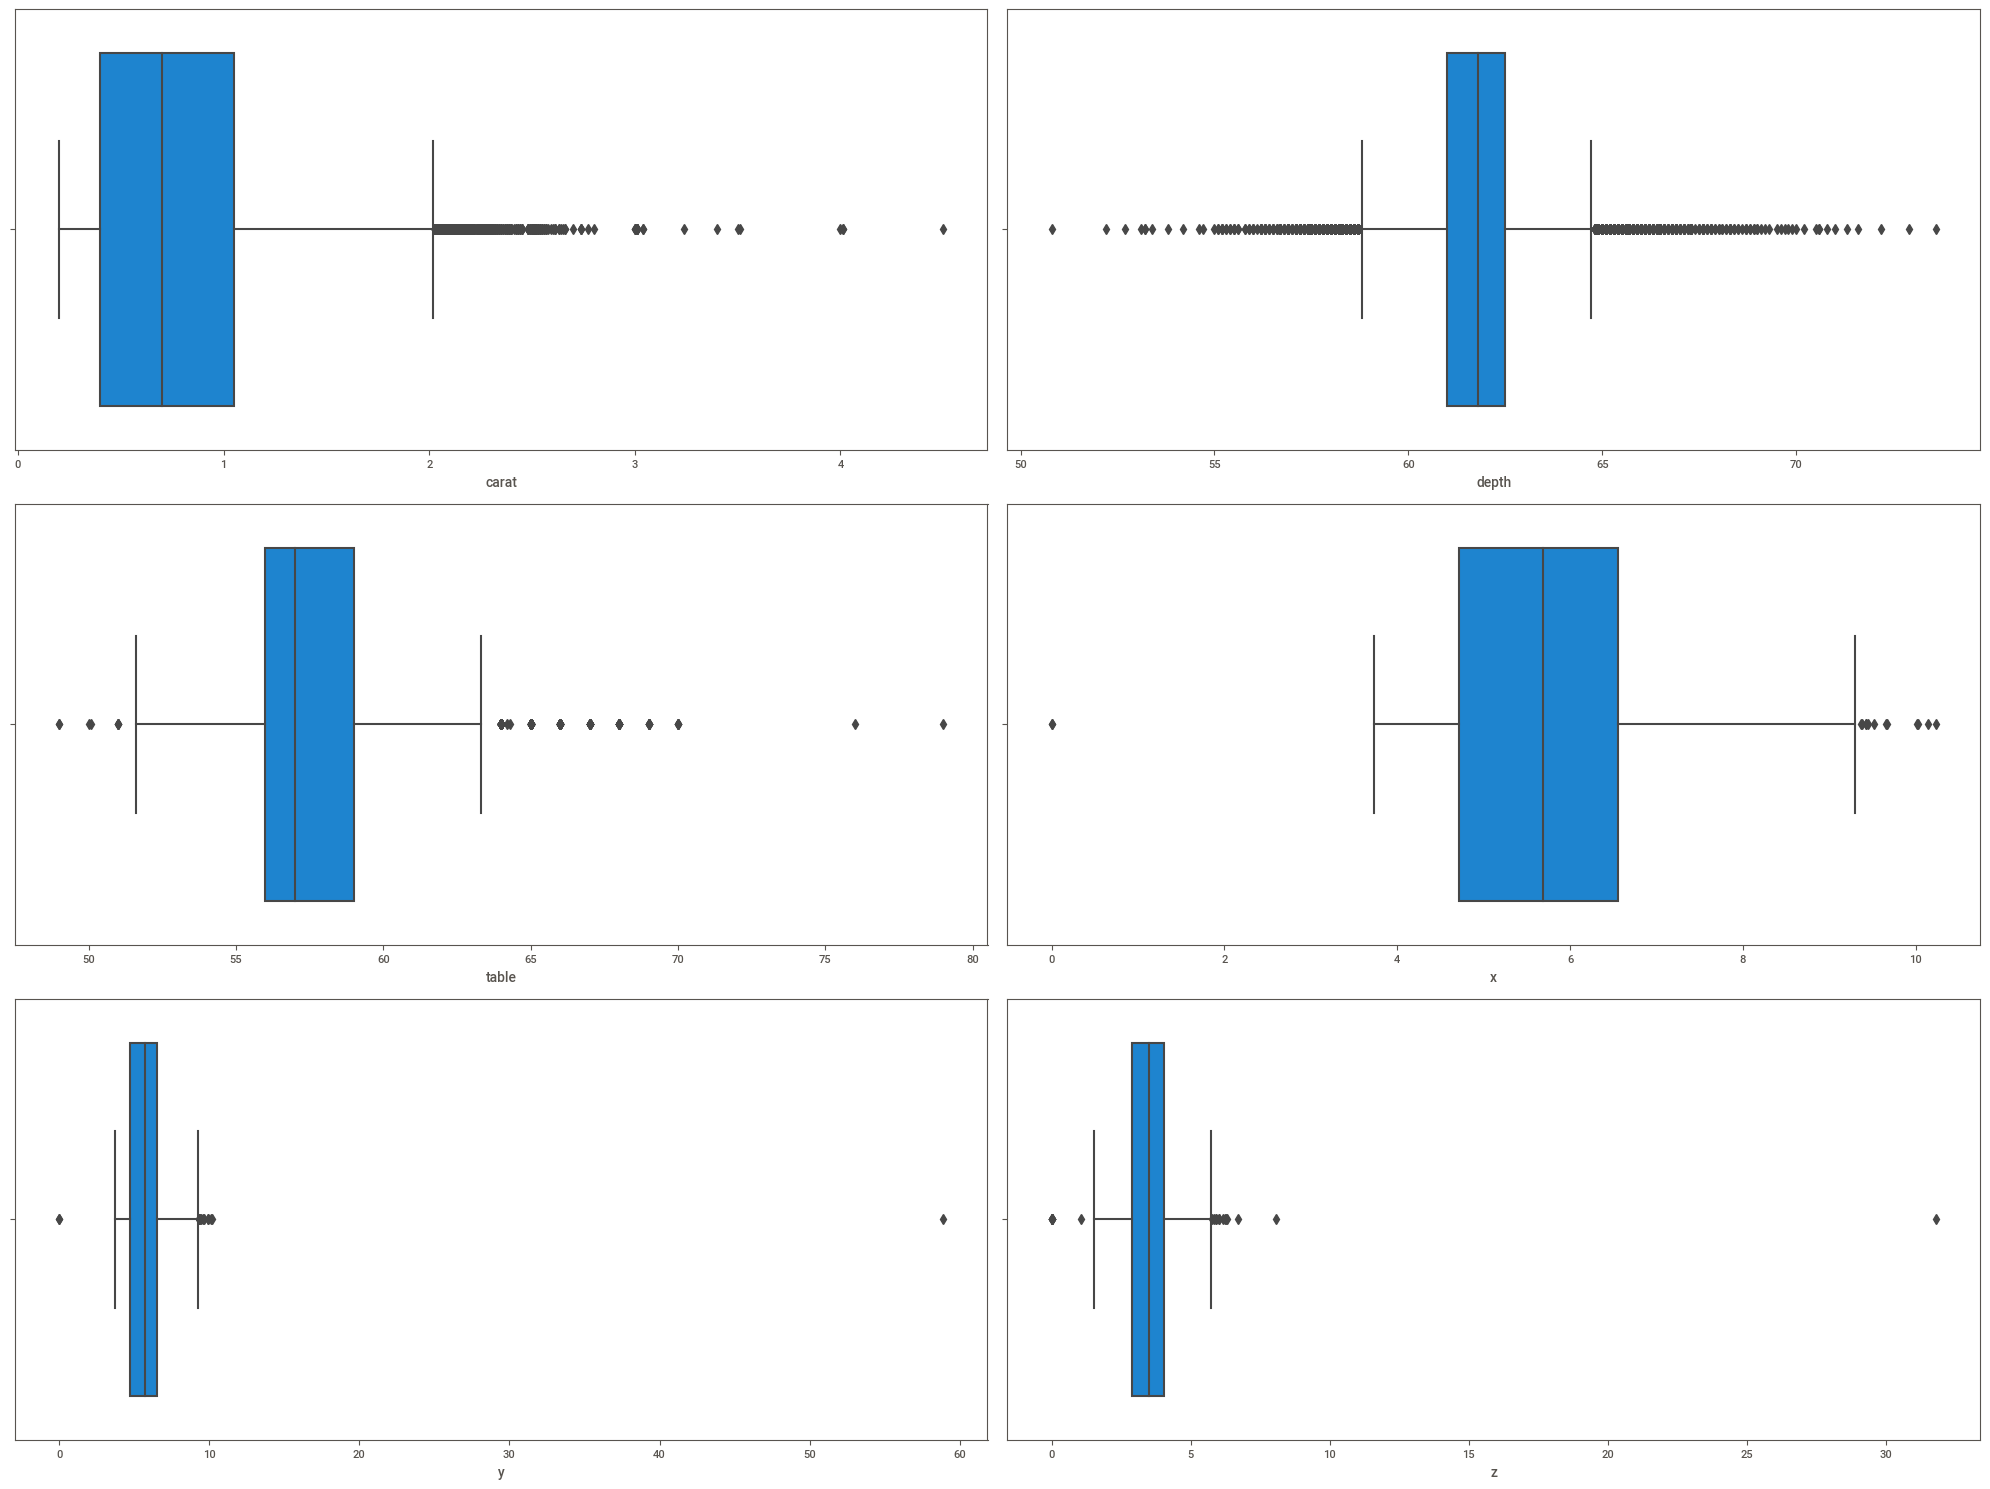

In [259]:
data_plot=df[['carat', 'depth', 'table', 'x','y','z']]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Box plot before Outliers Treatment',df.shape)


### Since there are too many outliers are most the data seems to be genuine valid data, hence we would concentrate on removing only the extreme outliers and leave the remaining as it is

In [260]:
for j in ['carat','depth','table','x','y','z','price']:
    outlier_list=[]
    q1,q3=np.nanpercentile(df[j],[25,75])
    q1,q3
    iqr=q3-q1
    iqr
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    upper,lower
    for i in df[j]:
        if i < lower or i > upper:
            outlier_list.append(i)
    print(color.BOLD + "Variable: {}".format(j) +color.END)
    print("Outliers: {}".format(np.sort(outlier_list)))
    print("Outlier Count: {}".format(len(outlier_list)))

Variable: carat
Outliers: [2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03 2.03
 2.03 2.03 2.03 2.03 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04
 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04
 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04 2.04
 2.04 2.04 2.04 2.04 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05
 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05
 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05 2.05
 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06
 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06 2.06
 2.06 2.06 2.06 2.06 2.06 2.07 2.07 2.07 2.07 2.07 

### find index position for extereme outliers and remove them from y and z variables

In [261]:
df.index[df['y']==58.9].tolist()

[25795]

In [262]:
df.iloc[25795]

carat       0.74
cut        Ideal
color          I
clarity      VS1
depth         62
table         56
x           5.79
y           5.82
z            3.6
price       2947
Name: 25826, dtype: object

In [263]:
df.index[df['z']==31.8].tolist()

[344]

In [264]:
df.iloc[344]

carat           0.51
cut        Very Good
color              E
clarity          VS1
depth            NaN
table           54.7
x               5.12
y               5.15
z               31.8
price           1970
Name: 344, dtype: object

In [265]:
df.drop(25795,inplace=True)

In [266]:
df.drop(344,inplace=True)

## Missing Values

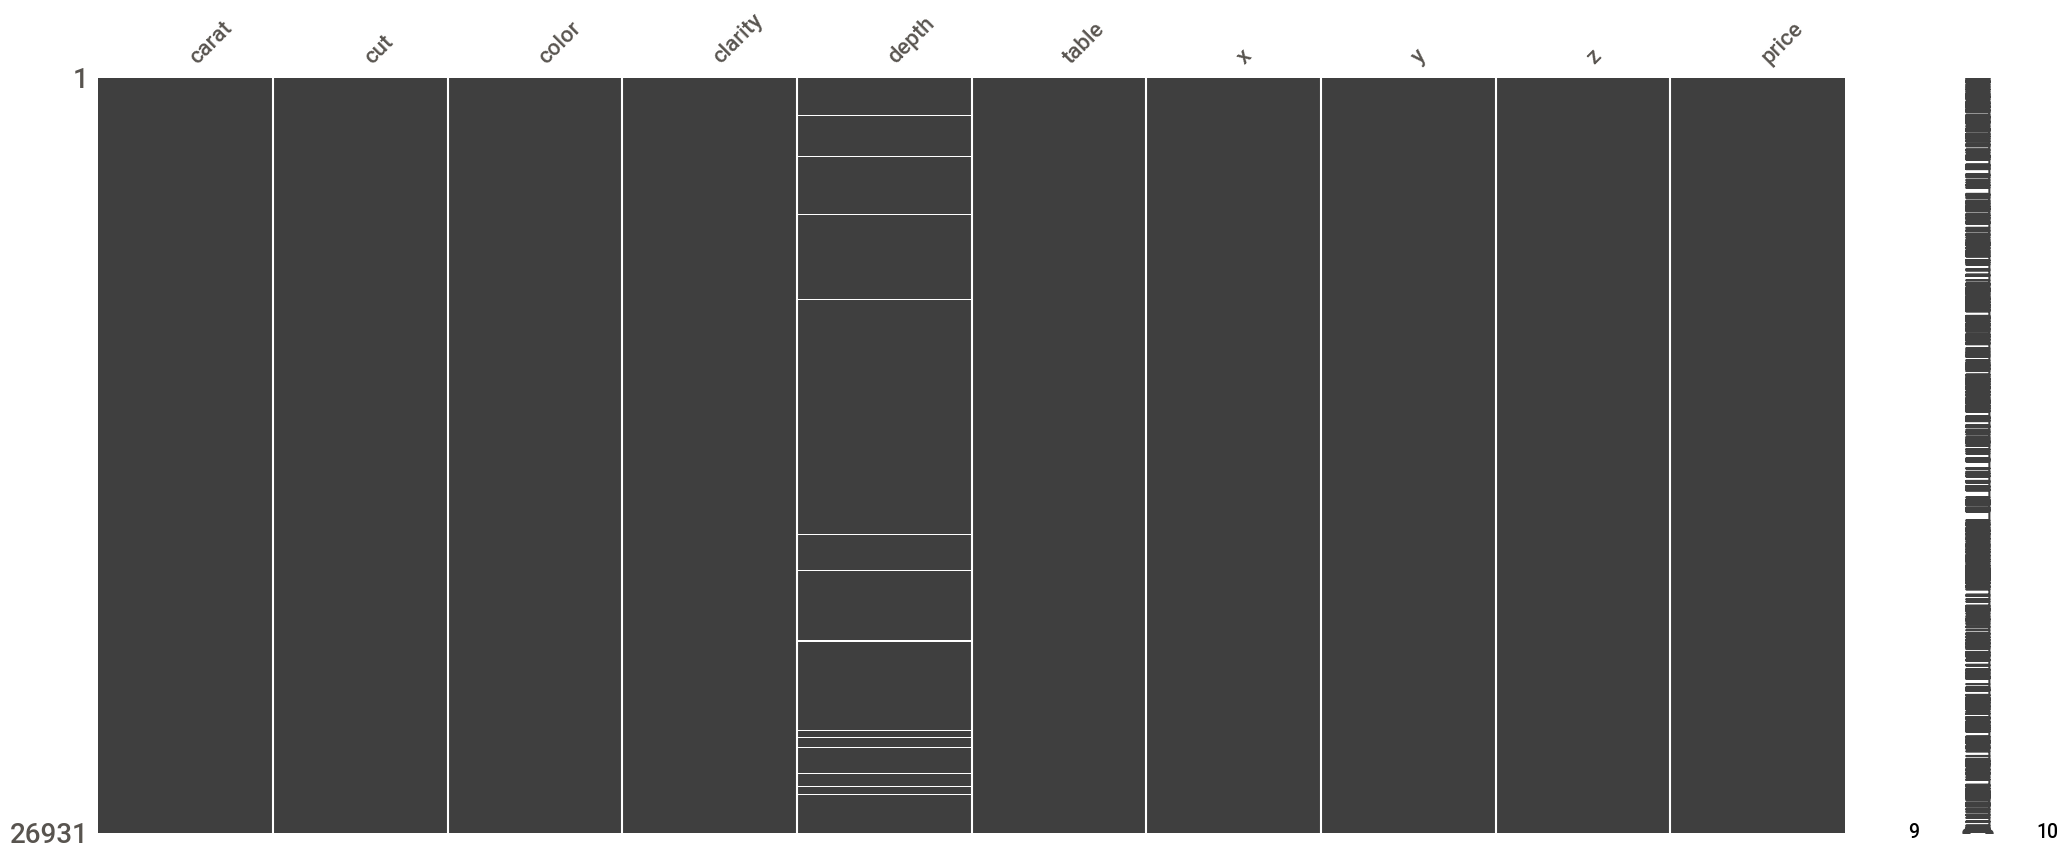

In [267]:
msno.matrix(df)

In [268]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      696
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Imputing missing values using Simple Imputer

In [269]:
si=SimpleImputer(strategy='median')

In [270]:
df['depth']=si.fit_transform(np.array(df['depth']).reshape(-1,1))

In [271]:
df.isna().sum().sum()

0

## Removing 0 values

In [272]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

8

In [273]:
for i in ['x','y','z']:
    df.drop(df[df[i]==0].index,inplace=True)

In [274]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

# Univariate and BiVariate Analysis

### Carat

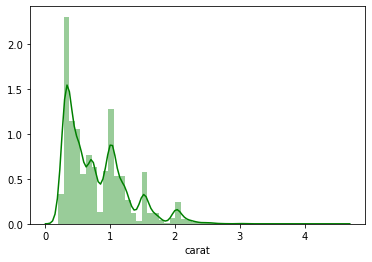

In [28]:
sns.distplot(df['carat'],color='g')

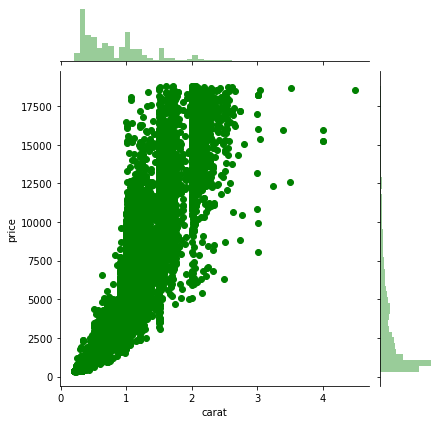

In [29]:
sns.jointplot(df['carat'],df['price'],color='g')

### Cut

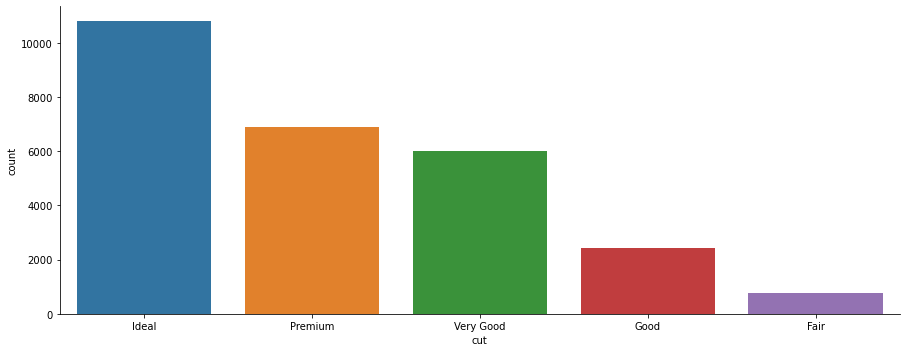

In [30]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

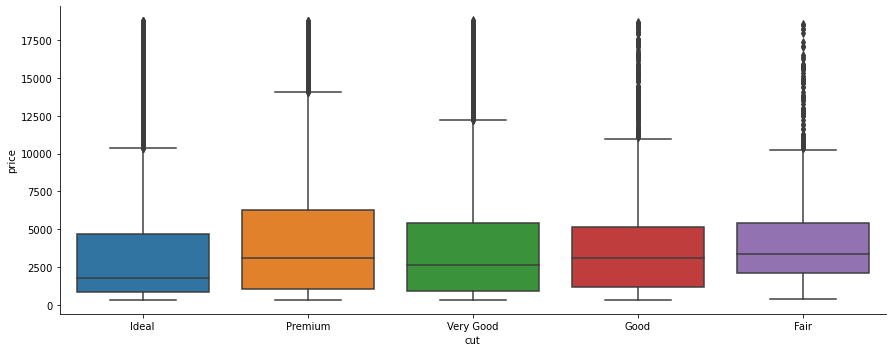

In [31]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

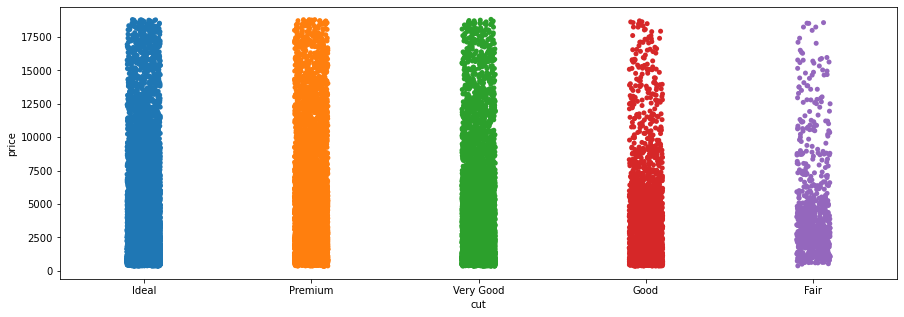

In [32]:
plt.figure(figsize=(15,5))
sns.stripplot(df['cut'],df['price'],jitter=True)

### Color

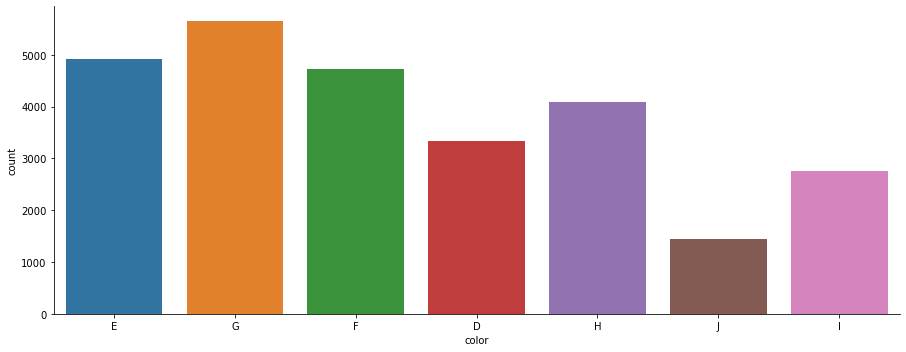

In [33]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5)

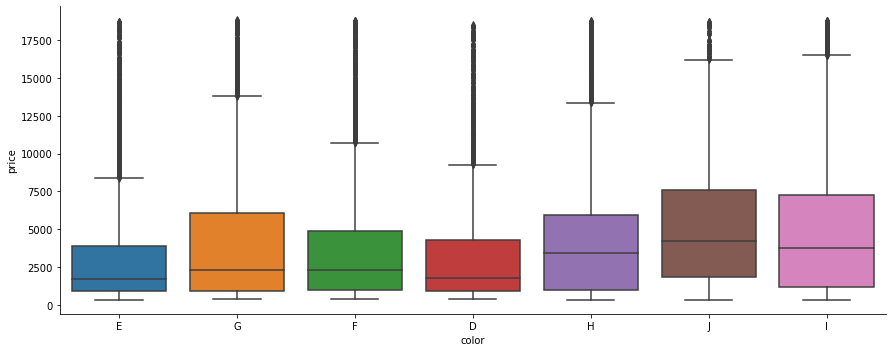

In [34]:
sns.factorplot(x='color', y='price' , data=df , kind='box', aspect=2.5)

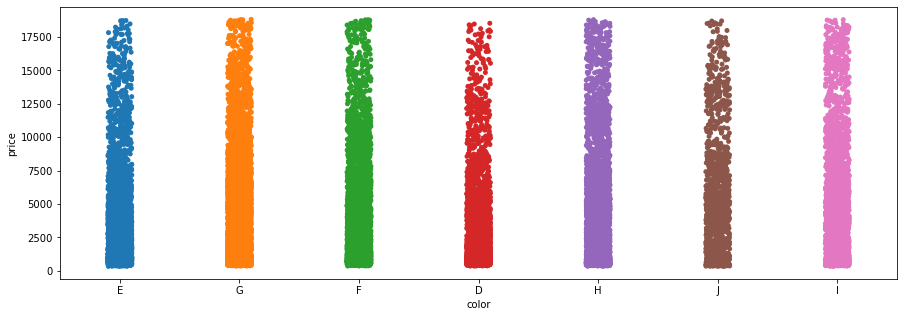

In [35]:
plt.figure(figsize=(15,5))
sns.stripplot(df['color'],df['price'],jitter=True)

### Clarity

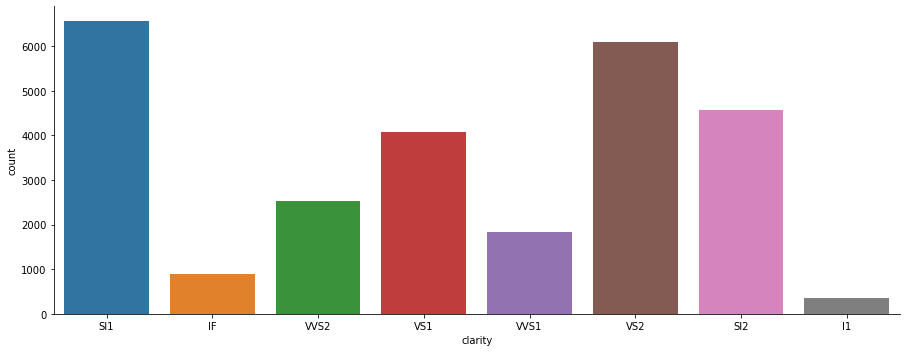

In [36]:
sns.factorplot(x='clarity', data=df , kind='count',aspect=2.5 )

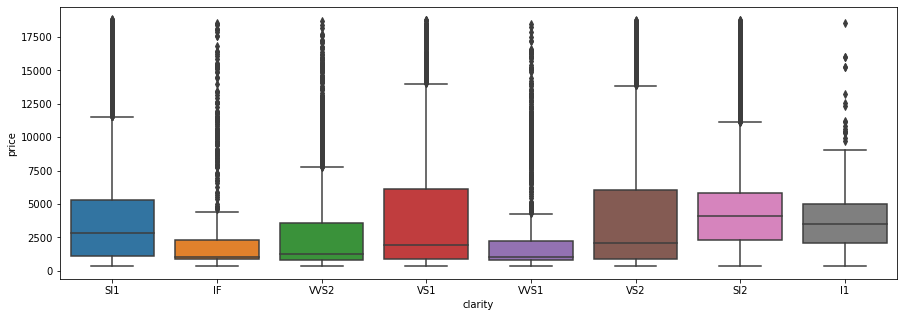

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x='clarity', y='price', data=df )

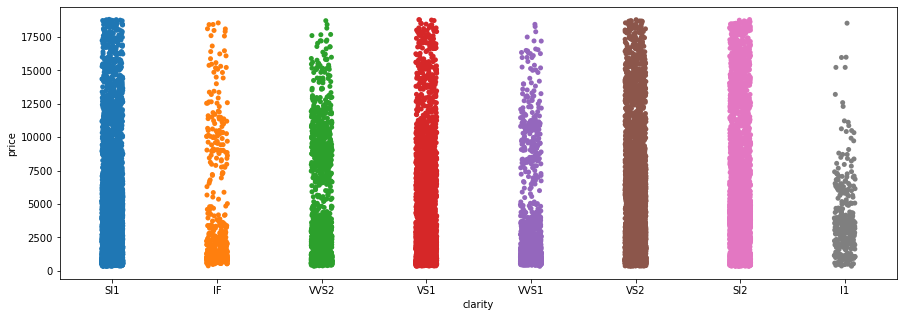

In [38]:
plt.figure(figsize=(15,5))
sns.stripplot(df['clarity'],df['price'],jitter=True)

### depth

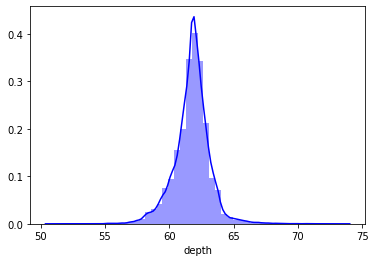

In [39]:
sns.distplot(df['depth'], color='blue')

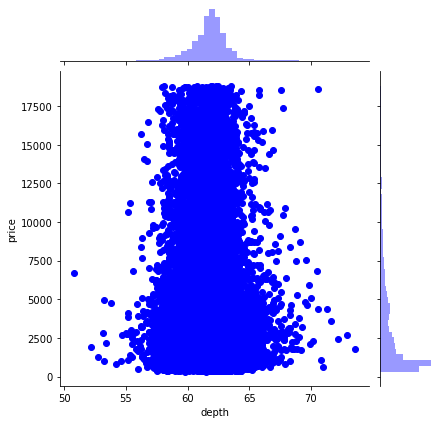

In [40]:
sns.jointplot(df['depth'],df['price'],color='blue')

### table

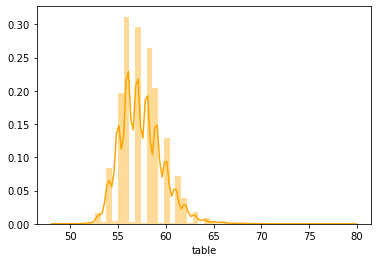

In [41]:
sns.distplot(df['table'], color='orange')

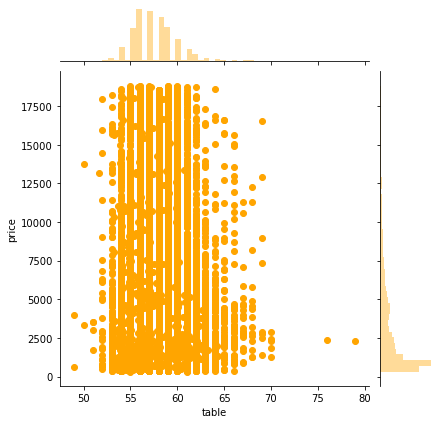

In [42]:
sns.jointplot(df['table'],df['price'],color='orange')

### x,y,z

(2.0, 10.0)

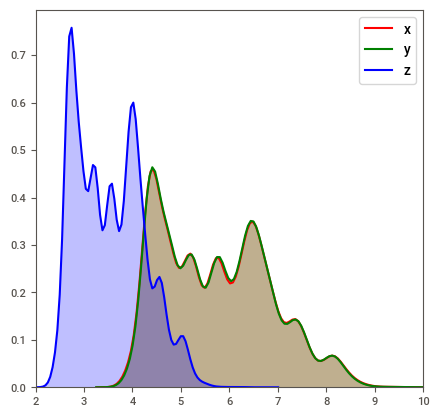

In [284]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

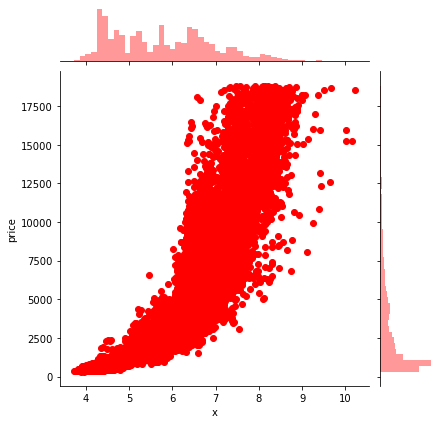

In [44]:
sns.jointplot(df['x'],df['price'],color='r')

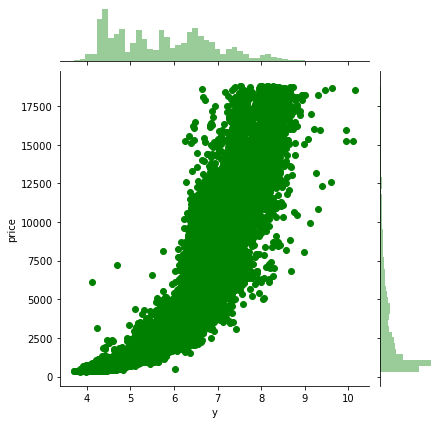

In [45]:
sns.jointplot(df['y'],df['price'],color='g')

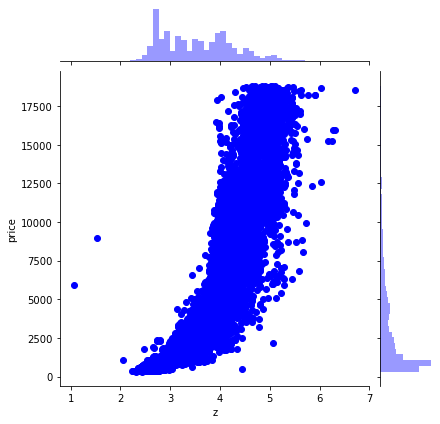

In [46]:
sns.jointplot(df['z'],df['price'],color='b')

### price

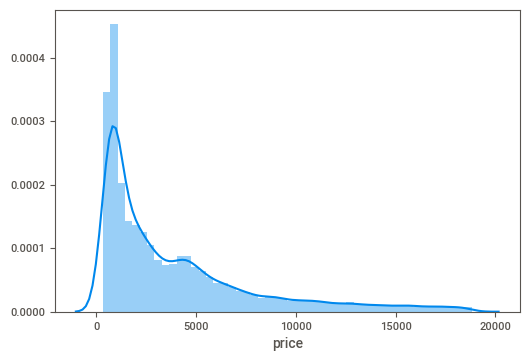

In [275]:
sns.distplot(df.price)

### Pairplot

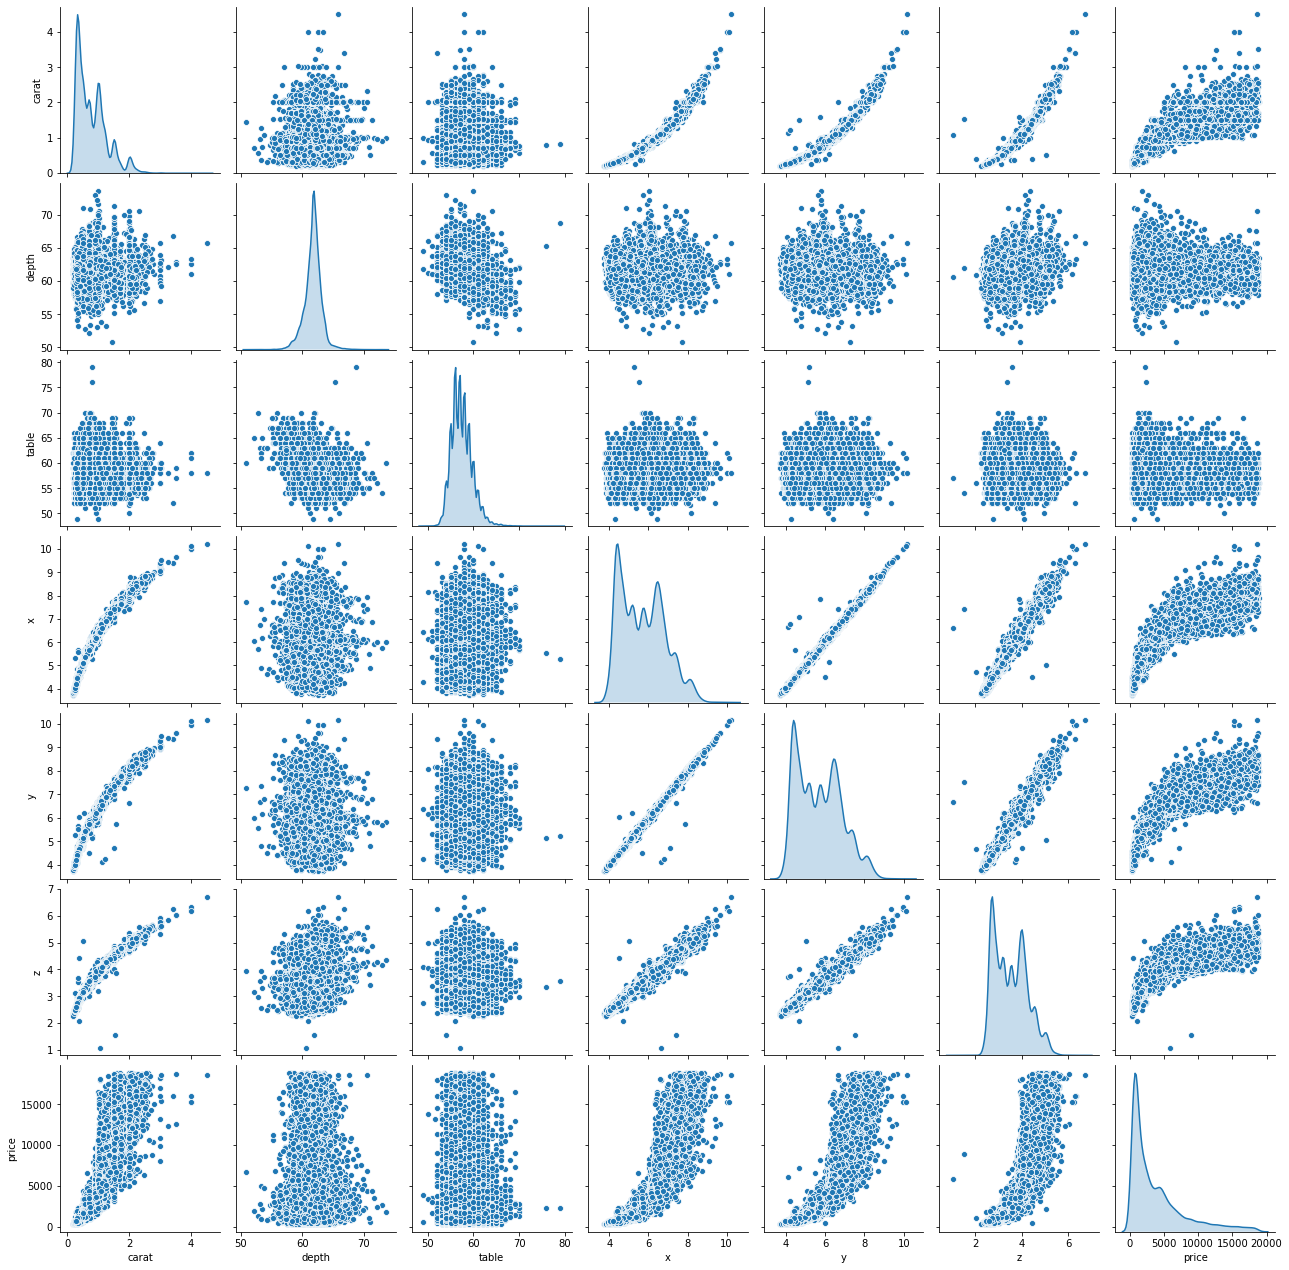

In [47]:
sns.pairplot(data=df,diag_kind='kde')

### Skewness of data

In [286]:
import scipy.stats as stats
pd.DataFrame(stats.skew(df[['carat','depth','table','x','y','z','price']]),
             index=['carat','depth','table','x','y','z','price'],columns=['Amount of Skewness'])

Amount of Skewness
carat            1.114812
depth           -0.028314
table            0.764795
x                0.401915
y                0.397254
z                0.399903
price            1.619163

### SweetViz Report

In [49]:
my_report  = sw.analyze([df,'SweetViz_Report_Problem1'],target_feat='price')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [287]:
my_report.show_html('SweetViz_Report_Problem1.html')

### Few observations from the report

In [290]:
dict={}

In [291]:
for i in ['Ideal','Premium','Very Good','Good','Fair']:
    dict.update({i:df[df['cut']==i][['x','y','z']].apply(np.mean).tolist()})

In [292]:
dict

{'Ideal': [5.500228597871384, 5.511295696436836, 3.3965580749652875],
 'Premium': [5.964647477831074, 5.9315321994475925, 3.644618403837753],
 'Very Good': [5.752464321274466, 5.781687686690991, 3.5649518752074263],
 'Good': [5.843726376335254, 5.858438783894818, 3.6461750205423153],
 'Fair': [6.292310654685506, 6.224159178433889, 3.998138639281128]}

Text(0.5, 1.0, 'Size to Cut Comparison')

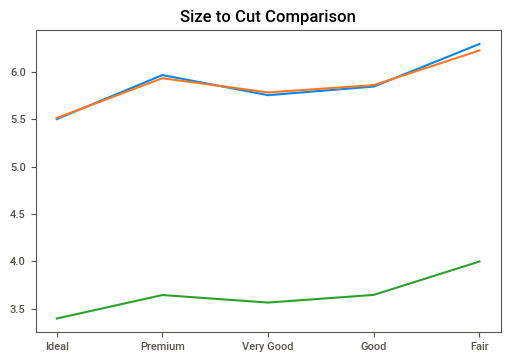

In [293]:
plt.plot(list(dict.keys()),list(dict.values()))
plt.title('Size to Cut Comparison')

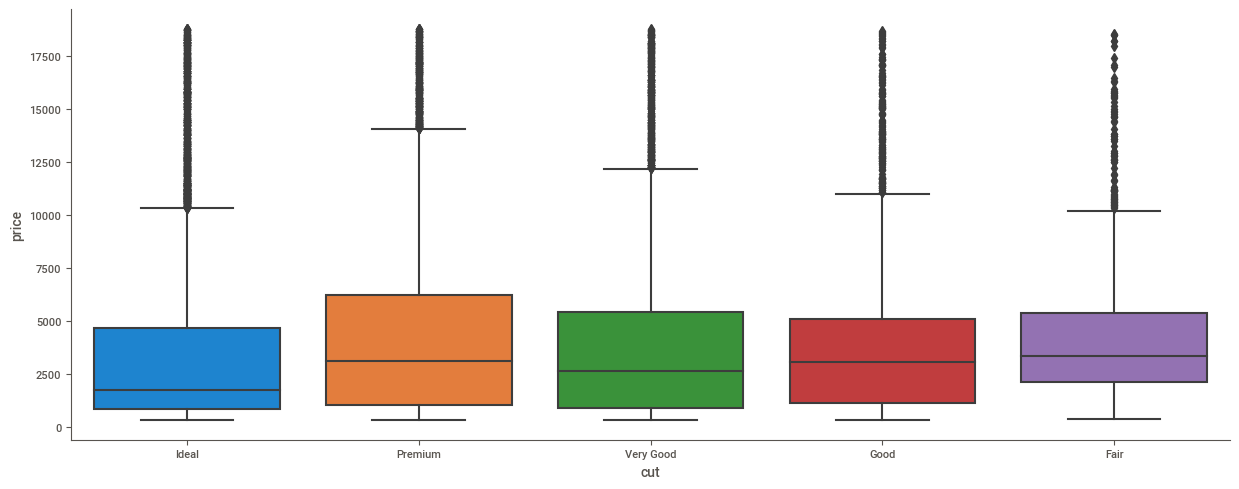

In [55]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

### Hence we can clearly see, the lowest quality cut i.e. Fair has biggest size, while best quality cut i.e. Ideal has smallest size.

### From the report we can see "Ideal" cut diamonds are having lesser average price than "Fair" quality cuts, thus indicating the size of the diamond has a bigger impact on the Price than the cut of the diamond

### We will further validate this finding by checking the co-efficients of the linear regression equation

In [294]:
dict={}

In [295]:
for i in ['D','E','F','G','H','I','J']:
    dict.update({i:df[df['color']==i][['x','y','z']].apply(np.mean).tolist()})

In [296]:
dict

{'D': [5.414384914696196, 5.4191290032924355, 3.341152349595923],
 'E': [5.404018311291969, 5.409381485249235, 3.3331820956256335],
 'F': [5.599747988140616, 5.60368064379501, 3.453972892842007],
 'G': [5.678966371681426, 5.680948672566386, 3.5069893805309595],
 'H': [5.977256723716367, 5.972305623471907, 3.6938948655256607],
 'I': [6.236795660036164, 6.236603978300179, 3.8557323688969247],
 'J': [6.514145833333331, 6.513729166666667, 4.030708333333333]}

Text(0.5, 1.0, 'Size to Color Comparison')

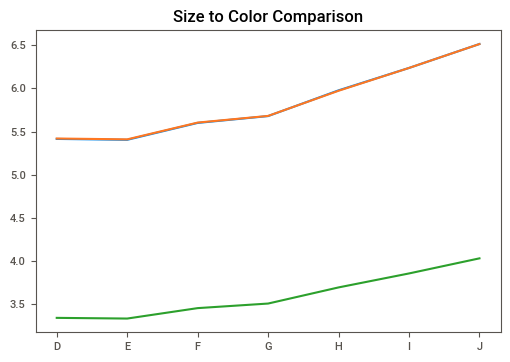

In [297]:
plt.plot(list(dict.keys()),list(dict.values()))
plt.title('Size to Color Comparison')

### Hence better the quality smaller the size.
### This is the reason why highest quality color diamond are not getting highest price, since size has more importance than the color

In [298]:
dict={}

In [299]:
for i in ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']:
    dict.update({i:df[df['clarity']==i][['x','y','z']].apply(np.mean).tolist()})

In [300]:
dict

{'FL': [nan, nan, nan],
 'IF': [4.943961840628508, 4.965230078563415, 3.045566778900111],
 'VVS1': [4.946900489396408, 4.962501359434475, 3.0538607939097244],
 'VVS2': [5.208213438735178, 5.222810276679837, 3.214541501976272],
 'VS1': [5.568599755201958, 5.573657282741742, 3.4346634026927725],
 'VS2': [5.664781680892979, 5.665993105712416, 3.4959569927774043],
 'SI1': [5.884581048141358, 5.884721206581373, 3.638021023765986],
 'SI2': [6.412436403508783, 6.402585526315803, 3.9574057017543924],
 'I1': [6.758535911602212, 6.708784530386736, 4.217486187845306],
 'I2': [nan, nan, nan],
 'I3': [nan, nan, nan]}

Text(0.5, 1.0, 'Size to Clarity Comparison')

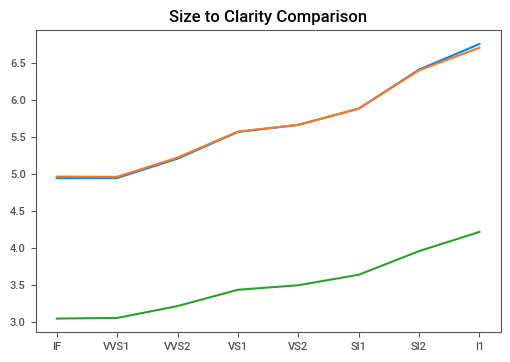

In [301]:
plt.plot(list(dict.keys()),list(dict.values()))
plt.title('Size to Clarity Comparison')

### Similar trend is observed here for clarity as well, lower the quality bigger the size, hence the best clarity diamonds do not command the highest price as they are generally smaller in size

### Checking Multicollinearity

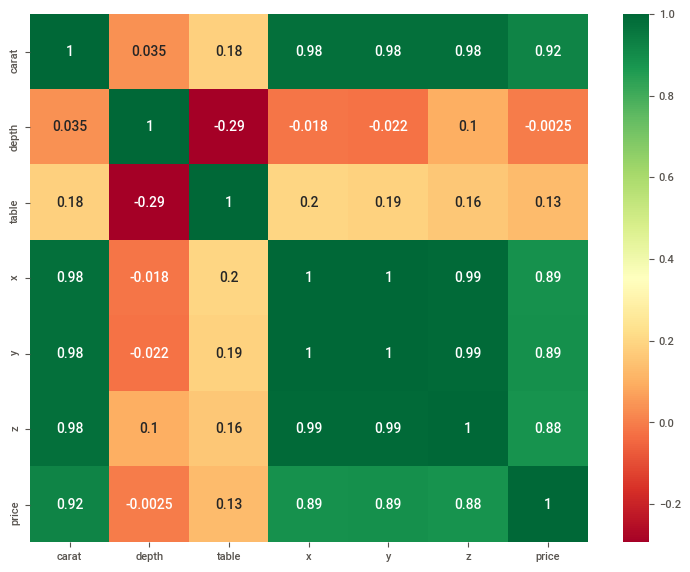

In [304]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

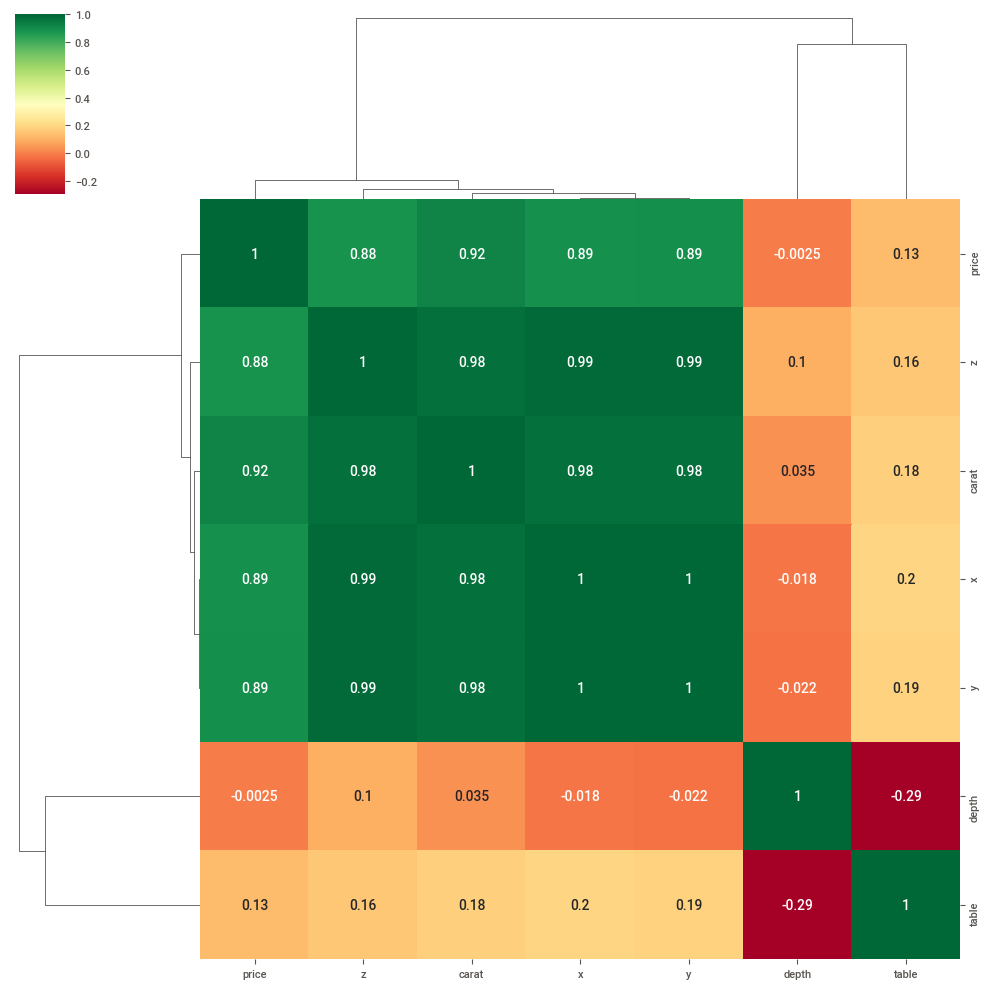

In [65]:
sns.clustermap(df.corr(),annot=True,cmap='RdYlGn')

### We can see very high multicollinearity between x,y,z.

## Encoding Categorical Data

In [66]:
df['cut'].value_counts()

Ideal        10805
Premium       6879
Very Good     6026
Good          2434
Fair           779
Name: cut, dtype: int64

In [67]:
df['cut']=df['cut'].map({'Fair':0,
                        'Good':1,
                        'Very Good':2,
                        'Premium':3,
                        'Ideal':4})

In [68]:
df['cut'].value_counts()

4    10805
3     6879
2     6026
1     2434
0      779
Name: cut, dtype: int64

In [69]:
df['color'].value_counts()

G    5650
E    4915
F    4722
H    4090
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [70]:
df['color']=df['color'].map({'D':6,
                            'E':5,
                            'F':4,
                            'G':3,
                            'H':2,
                            'I':1,
                            'J':0})

In [71]:
df['color'].value_counts()

3    5650
5    4915
4    4722
2    4090
6    3341
1    2765
0    1440
Name: color, dtype: int64

In [72]:
df['clarity'].value_counts()

SI1     6564
VS2     6092
SI2     4560
VS1     4085
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [73]:
df['clarity']=df['clarity'].map({'I3':0,
                                'I2':1,
                                'I1':2,
                                'SI2':3,
                                'SI1':4,
                                'VS2':5,
                                'VS1':6,
                                'VVS2':7,
                                'VVS1':8,
                                'IF':9,
                                'FL':10})

In [74]:
df['clarity'].value_counts()

4    6564
5    6092
3    4560
6    4085
7    2530
8    1839
9     891
2     362
Name: clarity, dtype: int64

In [75]:

df

carat  cut  color  clarity  depth  table     x     y     z  price
0       0.30    4      5        4   62.1   58.0  4.27  4.29  2.66    499
1       0.33    3      3        9   60.8   58.0  4.42  4.46  2.70    984
2       0.90    2      5        7   62.2   60.0  6.04  6.12  3.78   6289
3       0.42    4      4        6   61.6   56.0  4.82  4.80  2.96   1082
4       0.31    4      4        8   60.4   59.0  4.35  4.43  2.65    779
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
26962   1.11    3      3        4   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33    4      2        9   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    3      5        5   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27    2      4        7   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    3      0        4   62.0   58.0  6.90  6.88  4.27   5166

[26923 rows x 10 columns]

# Linear regression with x,y,z variables & scalling done all variables

In [76]:
df_temp=df.copy()

In [77]:
X=df_temp.drop('price',axis=1)
y=df_temp.pop('price')

In [78]:
print(X.shape,y.shape)

(26923, 9) (26923,)


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=22)

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [84]:
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),
                        columns=X_train.columns,index=X_train.index)

In [85]:
X_test_sc=pd.DataFrame(sc.transform(X_test),
                        columns=X_test.columns,index=X_test.index)

In [86]:
sc1=StandardScaler()

In [87]:
train_labels_sc=pd.DataFrame(sc1.fit_transform(np.array(train_labels).reshape(-1,1)),columns=['price'],index=train_labels.index)

In [88]:
test_labels_sc=pd.DataFrame(sc1.transform(np.array(test_labels).reshape(-1,1)),columns=['price'],index=test_labels.index)

In [89]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [90]:
regression_model.fit(X_train_sc, train_labels_sc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
for idx, col_name in enumerate(X_train_sc.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2943983225296194
The coefficient for cut is 0.03242302546457638
The coefficient for color is 0.13924970622345115
The coefficient for clarity is 0.2045351077335871
The coefficient for depth is 0.019068920511688316
The coefficient for table is -0.012095000895245003
The coefficient for x is -0.4368738361583276
The coefficient for y is 0.5482198060090812
The coefficient for z is -0.36922728097255614


## Since the co-efficient of x and z are negative indicating contradictory conclusion to our understanding above that x,y,z are highly and directly correalted to price. The co-efficients here indicate a different story.

## This might be due to high multi-collinearity. 

## Hence we decide to do feature engineering i.e. make a column named volume which would take into account all x,y,z.

## Feature Engineering

#### Combining x,y,z variables into a common 'volume' variable, since there is very high multi-collinearity between them

In [92]:
df['volume']=df['x']*df['y']*df['z']

In [93]:
df.head()

carat  cut  color  clarity  depth  table     x     y     z  price  \
0   0.30    4      5        4   62.1   58.0  4.27  4.29  2.66    499   
1   0.33    3      3        9   60.8   58.0  4.42  4.46  2.70    984   
2   0.90    2      5        7   62.2   60.0  6.04  6.12  3.78   6289   
3   0.42    4      4        6   61.6   56.0  4.82  4.80  2.96   1082   
4   0.31    4      4        8   60.4   59.0  4.35  4.43  2.65    779   

       volume  
0   48.726678  
1   53.225640  
2  139.726944  
3   68.482560  
4   51.066825

#### dropping x,y,z variables

In [94]:
df.drop(['x','y','z'],axis=1,inplace=True)

In [95]:
df.head()

carat  cut  color  clarity  depth  table  price      volume
0   0.30    4      5        4   62.1   58.0    499   48.726678
1   0.33    3      3        9   60.8   58.0    984   53.225640
2   0.90    2      5        7   62.2   60.0   6289  139.726944
3   0.42    4      4        6   61.6   56.0   1082   68.482560
4   0.31    4      4        8   60.4   59.0    779   51.066825

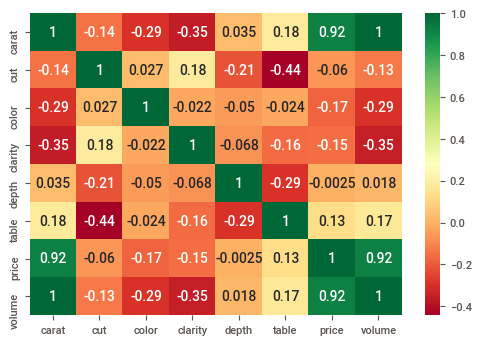

In [96]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

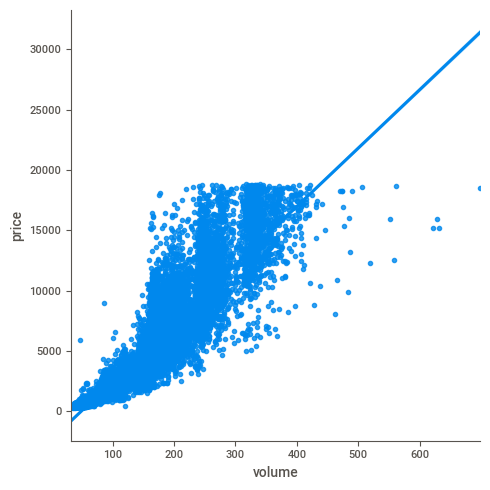

In [97]:
sns.lmplot(x='volume',y='price',data=df)

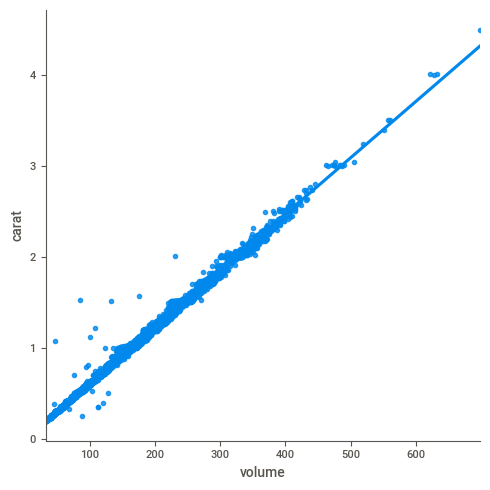

In [98]:
sns.lmplot(x='volume',y='carat',data=df)

In [99]:
df=df[['carat','cut','color','clarity','depth','table','volume','price']]

In [102]:
df

carat  cut  color  clarity  depth  table      volume  price
0       0.30    4      5        4   62.1   58.0   48.726678    499
1       0.33    3      3        9   60.8   58.0   53.225640    984
2       0.90    2      5        7   62.2   60.0  139.726944   6289
3       0.42    4      4        6   61.6   56.0   68.482560   1082
4       0.31    4      4        8   60.4   59.0   51.066825    779
...      ...  ...    ...      ...    ...    ...         ...    ...
26962   1.11    3      3        4   62.3   58.0  176.267548   5408
26963   0.33    4      2        9   61.9   55.0   53.771952   1114
26964   0.51    3      5        5   61.7   58.0   83.586560   1656
26965   0.27    2      4        7   61.8   56.0   45.754800    682
26966   1.25    3      0        4   62.0   58.0  202.705440   5166

[26923 rows x 8 columns]

## Test Train Split

In [103]:
X=df.drop('price',axis=1)
y=df.pop('price')

In [104]:
print(X.shape,y.shape)

(26923, 7) (26923,)


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=22)

In [106]:
X_train

carat  cut  color  clarity  depth  table      volume
1336    1.50    1      4        3   59.7   61.0  243.568488
7994    0.75    3      0        3   62.9   56.0  118.939392
16909   0.41    3      4        5   60.3   58.0   67.744800
18459   0.41    4      3        3   61.7   56.0   68.198104
26836   1.00    4      5        4   61.9   56.0  163.113405
...      ...  ...    ...      ...    ...    ...         ...
23063   1.51    3      2        2   60.9   56.0  238.961448
21892   0.52    4      6        5   61.8   56.0   84.892600
24970   2.14    4      2        3   63.0   55.0  352.388025
22693   1.07    2      2        5   61.5   57.0  176.849946
11136   0.72    1      3        5   59.7   60.5  117.535840

[18846 rows x 7 columns]

# Approach 1  
# Standardizing only the numerical variables, leaving out categorical variables

#### standardizing training set

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [108]:
X_train_sc=pd.DataFrame(sc.fit_transform(X_train[['carat','depth','table','volume']]),
                        columns=['carat','depth','table','volume'],index=X_train.index)

In [109]:
X_train_standard=X_train.copy()

In [110]:
X_train_standard[['carat','depth','table','volume']]=X_train_sc[['carat','depth','table','volume']]

In [111]:
X_train_standard

carat  cut  color  clarity     depth     table    volume
1336   1.478864    1      4        3 -1.468771  1.606158  1.485209
7994  -0.097300    3      0        3  0.831315 -0.654769 -0.138600
16909 -0.811827    3      4        5 -1.037505  0.249602 -0.805621
18459 -0.811827    4      3        3 -0.031217 -0.654769 -0.799715
26836  0.428088    4      5        4  0.112538 -0.654769  0.436949
...         ...  ...    ...      ...       ...       ...       ...
23063  1.499879    3      2        2 -0.606239 -0.654769  1.425183
21892 -0.580656    4      6        5  0.040661 -0.654769 -0.582200
24970  2.823856    4      2        3  0.903193 -1.106955  2.903032
22693  0.575197    2      2        5 -0.174973 -0.202584  0.615924
11136 -0.160346    1      3        5 -1.468771  1.380066 -0.156887

[18846 rows x 7 columns]

In [112]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()

In [113]:
train_labels_standard=sc1.fit_transform(np.array(train_labels).reshape(-1,1))

In [114]:
train_labels_standard=pd.DataFrame(train_labels_standard,columns=['price'],index=X_train_standard.index)
train_labels_standard

price
1336   1.066138
7994  -0.582847
16909 -0.703150
18459 -0.817951
26836  0.385085
...         ...
23063  0.121467
21892 -0.500060
24970  2.201395
22693  0.334062
11136 -0.285714

[18846 rows x 1 columns]

#### standardizing testing set

In [115]:
X_test_sc=pd.DataFrame(sc.transform(X_test[['carat','depth','table','volume']]),
                        columns=['carat','depth','table','volume'],index=X_test.index)

In [116]:
X_test_standard=X_test.copy()

In [117]:
X_test_standard[['carat','depth','table','volume']]=X_test_sc[['carat','depth','table','volume']]

In [118]:
X_test_standard

carat  cut  color  clarity     depth     table    volume
20799  1.499879    1      0        4  1.693847  1.606158  1.397149
4497  -0.160346    2      4        4  1.190703  0.249602 -0.177687
22248  0.848398    4      2        3 -0.462483 -0.202584  0.876949
24428 -0.748780    4      2        4 -0.103095 -0.654769 -0.743568
19875 -0.811827    4      6        4  0.400049 -1.106955 -0.801151
...         ...  ...    ...      ...       ...       ...       ...
4931  -0.874873    4      3        8 -0.031217 -1.106955 -0.861805
13926 -0.160346    2      4        4  0.328171  0.701787 -0.155771
4096  -0.811827    4      3        8 -0.103095 -0.202584 -0.823319
20244  1.520895    0      2        4  2.556379  0.249602  1.383042
26643 -1.021982    3      3        4 -0.965627  0.249602 -1.015790

[8077 rows x 7 columns]

In [119]:
test_labels_standard=sc1.transform(np.array(test_labels).reshape(-1,1))

In [120]:
test_labels_standard=pd.DataFrame(test_labels_standard,columns=['price'],index=X_test_standard.index)
test_labels_standard

price
20799  0.648452
4497  -0.312226
22248  0.112463
24428 -0.752172
19875 -0.726160
...         ...
4931  -0.731663
13926 -0.378756
4096  -0.716156
20244  1.021118
26643 -0.831708

[8077 rows x 1 columns]

### Applying Linear regression using sklearn

In [121]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [122]:
regression_model.fit(X_train_standard, train_labels_standard)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
for idx, col_name in enumerate(X_train_standard.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.18873158516284608
The coefficient for cut is 0.026119603689082053
The coefficient for color is 0.0806959300305599
The coefficient for clarity is 0.13045077239854122
The coefficient for depth is 0.0040839507495419505
The coefficient for table is -0.00297869526583252
The coefficient for volume is 0.8560817934245969


In [124]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.0091686380587266


In [125]:
regression_model.score(X_train_standard, train_labels_standard)

0.9067848379536938

In [126]:
regression_model.score(X_test_standard, test_labels_standard)

0.9066135941590904

## Using Stats Model

In [127]:
data_train = pd.concat([X_train_standard,train_labels_standard], axis=1)
data_train

carat  cut  color  clarity     depth     table    volume     price
1336   1.478864    1      4        3 -1.468771  1.606158  1.485209  1.066138
7994  -0.097300    3      0        3  0.831315 -0.654769 -0.138600 -0.582847
16909 -0.811827    3      4        5 -1.037505  0.249602 -0.805621 -0.703150
18459 -0.811827    4      3        3 -0.031217 -0.654769 -0.799715 -0.817951
26836  0.428088    4      5        4  0.112538 -0.654769  0.436949  0.385085
...         ...  ...    ...      ...       ...       ...       ...       ...
23063  1.499879    3      2        2 -0.606239 -0.654769  1.425183  0.121467
21892 -0.580656    4      6        5  0.040661 -0.654769 -0.582200 -0.500060
24970  2.823856    4      2        3  0.903193 -1.106955  2.903032  2.201395
22693  0.575197    2      2        5 -0.174973 -0.202584  0.615924  0.334062
11136 -0.160346    1      3        5 -1.468771  1.380066 -0.156887 -0.285714

[18846 rows x 8 columns]

In [128]:
data_test = pd.concat([X_test_standard,test_labels_standard], axis=1)
data_test

carat  cut  color  clarity     depth     table    volume     price
20799  1.499879    1      0        4  1.693847  1.606158  1.397149  0.648452
4497  -0.160346    2      4        4  1.190703  0.249602 -0.177687 -0.312226
22248  0.848398    4      2        3 -0.462483 -0.202584  0.876949  0.112463
24428 -0.748780    4      2        4 -0.103095 -0.654769 -0.743568 -0.752172
19875 -0.811827    4      6        4  0.400049 -1.106955 -0.801151 -0.726160
...         ...  ...    ...      ...       ...       ...       ...       ...
4931  -0.874873    4      3        8 -0.031217 -1.106955 -0.861805 -0.731663
13926 -0.160346    2      4        4  0.328171  0.701787 -0.155771 -0.378756
4096  -0.811827    4      3        8 -0.103095 -0.202584 -0.823319 -0.716156
20244  1.520895    0      2        4  2.556379  0.249602  1.383042  1.021118
26643 -1.021982    3      3        4 -0.965627  0.249602 -1.015790 -0.831708

[8077 rows x 8 columns]

In [129]:
import statsmodels.formula.api as smf
lm1_train = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_train).fit()
lm1_train.params

Intercept   -1.009169
carat        0.188732
cut          0.026120
color        0.080696
clarity      0.130451
depth        0.004084
table       -0.002979
volume       0.856082
dtype: float64

In [134]:
mse_train=np.mean((regression_model.predict(X_train_standard)-train_labels_standard)**2)

In [136]:
import math
rmse_train=math.sqrt(mse_train)
rmse_train

0.30531158190659385

In [130]:
import statsmodels.formula.api as smf
lm1_test = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_test).fit()
lm1_test.params

Intercept   -1.028617
carat        0.171402
cut          0.032974
color        0.081707
clarity      0.130362
depth        0.000072
table       -0.002932
volume       0.881652
dtype: float64

In [137]:
mse_test=np.mean((regression_model.predict(X_test_standard)-test_labels_standard)**2)

In [138]:
import math
rmse_test=math.sqrt(mse_test)
rmse_test

0.3112662256780495

In [131]:
print(lm1_train.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:55:46   Log-Likelihood:                -4382.0
No. Observations:               18846   AIC:                             8780.
Df Residuals:                   18838   BIC:                             8843.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0092      0.012    -87.191      0.0

In [132]:
print(lm1_test.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:55:48   Log-Likelihood:                -2027.6
No. Observations:                8077   AIC:                             4071.
Df Residuals:                    8069   BIC:                             4127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0286      0.018    -56.163      0.0

## Approach  - 2 
## Now trying with standardizing all variables including categorical variables

In [200]:
X_train, X_test, train_labels, test_labels

(       carat  cut  color  clarity  depth  table      volume
 1336    1.50    1      4        3   59.7   61.0  243.568488
 7994    0.75    3      0        3   62.9   56.0  118.939392
 16909   0.41    3      4        5   60.3   58.0   67.744800
 18459   0.41    4      3        3   61.7   56.0   68.198104
 26836   1.00    4      5        4   61.9   56.0  163.113405
 ...      ...  ...    ...      ...    ...    ...         ...
 23063   1.51    3      2        2   60.9   56.0  238.961448
 21892   0.52    4      6        5   61.8   56.0   84.892600
 24970   2.14    4      2        3   63.0   55.0  352.388025
 22693   1.07    2      2        5   61.5   57.0  176.849946
 11136   0.72    1      3        5   59.7   60.5  117.535840
 
 [18846 rows x 7 columns],
        carat  cut  color  clarity  depth  table      volume
 20799   1.51    1      0        4   64.1   61.0  236.809840
 4497    0.72    2      4        4   63.4   58.0  115.939440
 22248   1.20    4      2        3   61.1   57.0  196.88

In [201]:
sc=StandardScaler()

In [202]:
X_train_standard=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_train_standard

carat       cut     color   clarity     depth     table    volume
1336   1.478864 -1.722339  0.356013 -1.244539 -1.468771  1.606158  1.485209
7994  -0.097300  0.080850 -1.987479 -1.244539  0.831315 -0.654769 -0.138600
16909 -0.811827  0.080850  0.356013 -0.033198 -1.037505  0.249602 -0.805621
18459 -0.811827  0.982444 -0.229860 -1.244539 -0.031217 -0.654769 -0.799715
26836  0.428088  0.982444  0.941886 -0.638869  0.112538 -0.654769  0.436949
...         ...       ...       ...       ...       ...       ...       ...
23063  1.499879  0.080850 -0.815733 -1.850209 -0.606239 -0.654769  1.425183
21892 -0.580656  0.982444  1.527759 -0.033198  0.040661 -0.654769 -0.582200
24970  2.823856  0.982444 -0.815733 -1.244539  0.903193 -1.106955  2.903032
22693  0.575197 -0.820745 -0.815733 -0.033198 -0.174973 -0.202584  0.615924
11136 -0.160346 -1.722339 -0.229860 -0.033198 -1.468771  1.380066 -0.156887

[18846 rows x 7 columns]

In [203]:
sc1=StandardScaler()

In [204]:
train_labels_standard=pd.DataFrame(sc1.fit_transform(np.array(train_labels).reshape(-1,1)),
                                                         columns=['price'],index=train_labels.index)
train_labels_standard

price
1336   1.066138
7994  -0.582847
16909 -0.703150
18459 -0.817951
26836  0.385085
...         ...
23063  0.121467
21892 -0.500060
24970  2.201395
22693  0.334062
11136 -0.285714

[18846 rows x 1 columns]

In [205]:
X_test_standard=pd.DataFrame(sc.transform(X_test),columns=X_test.columns,index=X_test.index)
X_test_standard

carat       cut     color   clarity     depth     table    volume
20799  1.499879 -1.722339 -1.987479 -0.638869  1.693847  1.606158  1.397149
4497  -0.160346 -0.820745  0.356013 -0.638869  1.190703  0.249602 -0.177687
22248  0.848398  0.982444 -0.815733 -1.244539 -0.462483 -0.202584  0.876949
24428 -0.748780  0.982444 -0.815733 -0.638869 -0.103095 -0.654769 -0.743568
19875 -0.811827  0.982444  1.527759 -0.638869  0.400049 -1.106955 -0.801151
...         ...       ...       ...       ...       ...       ...       ...
4931  -0.874873  0.982444 -0.229860  1.783813 -0.031217 -1.106955 -0.861805
13926 -0.160346 -0.820745  0.356013 -0.638869  0.328171  0.701787 -0.155771
4096  -0.811827  0.982444 -0.229860  1.783813 -0.103095 -0.202584 -0.823319
20244  1.520895 -2.623933 -0.815733 -0.638869  2.556379  0.249602  1.383042
26643 -1.021982  0.080850 -0.229860 -0.638869 -0.965627  0.249602 -1.015790

[8077 rows x 7 columns]

In [206]:
test_labels_standard=pd.DataFrame(sc1.transform(np.array(test_labels).reshape(-1,1)),
                                                         columns=['price'],index=test_labels.index)
test_labels_standard

price
20799  0.648452
4497  -0.312226
22248  0.112463
24428 -0.752172
19875 -0.726160
...         ...
4931  -0.731663
13926 -0.378756
4096  -0.716156
20244  1.021118
26643 -0.831708

[8077 rows x 1 columns]

## Using sklearn library

In [207]:
regression_model = LinearRegression()

In [208]:
regression_model.fit(X_train_standard, train_labels_standard)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
for idx, col_name in enumerate(X_train_standard.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.1887315851628435
The coefficient for cut is 0.028970460207015138
The coefficient for color is 0.13773623193127432
The coefficient for clarity is 0.2153824694329573
The coefficient for depth is 0.0040839507495416755
The coefficient for table is -0.0029786952658301083
The coefficient for volume is 0.8560817934245999


In [210]:
intercept = regression_model.intercept_[0]

In [211]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4.921098225165882e-17


In [212]:
regression_model.score(X_train_standard, train_labels_standard)

0.9067848379536938

In [213]:
regression_model.score(X_test_standard, test_labels_standard)

0.9066135941590904

## Using StatsModel Library

In [214]:
data_train = pd.concat([X_train_standard,train_labels_standard], axis=1)
data_train

carat       cut     color   clarity     depth     table    volume  \
1336   1.478864 -1.722339  0.356013 -1.244539 -1.468771  1.606158  1.485209   
7994  -0.097300  0.080850 -1.987479 -1.244539  0.831315 -0.654769 -0.138600   
16909 -0.811827  0.080850  0.356013 -0.033198 -1.037505  0.249602 -0.805621   
18459 -0.811827  0.982444 -0.229860 -1.244539 -0.031217 -0.654769 -0.799715   
26836  0.428088  0.982444  0.941886 -0.638869  0.112538 -0.654769  0.436949   
...         ...       ...       ...       ...       ...       ...       ...   
23063  1.499879  0.080850 -0.815733 -1.850209 -0.606239 -0.654769  1.425183   
21892 -0.580656  0.982444  1.527759 -0.033198  0.040661 -0.654769 -0.582200   
24970  2.823856  0.982444 -0.815733 -1.244539  0.903193 -1.106955  2.903032   
22693  0.575197 -0.820745 -0.815733 -0.033198 -0.174973 -0.202584  0.615924   
11136 -0.160346 -1.722339 -0.229860 -0.033198 -1.468771  1.380066 -0.156887   

          price  
1336   1.066138  
7994  -0.582847  
16909 -0.703150  
18459 -0.817951  
26836  0.385085  
...         ...  
23063  0.121467  
21892 -0.500060  
24970  2.201395  
22693  0.334062  
11136 -0.285714  

[18846 rows x 8 columns]

In [215]:
data_test = pd.concat([X_test_standard,test_labels_standard], axis=1)
data_test

carat       cut     color   clarity     depth     table    volume  \
20799  1.499879 -1.722339 -1.987479 -0.638869  1.693847  1.606158  1.397149   
4497  -0.160346 -0.820745  0.356013 -0.638869  1.190703  0.249602 -0.177687   
22248  0.848398  0.982444 -0.815733 -1.244539 -0.462483 -0.202584  0.876949   
24428 -0.748780  0.982444 -0.815733 -0.638869 -0.103095 -0.654769 -0.743568   
19875 -0.811827  0.982444  1.527759 -0.638869  0.400049 -1.106955 -0.801151   
...         ...       ...       ...       ...       ...       ...       ...   
4931  -0.874873  0.982444 -0.229860  1.783813 -0.031217 -1.106955 -0.861805   
13926 -0.160346 -0.820745  0.356013 -0.638869  0.328171  0.701787 -0.155771   
4096  -0.811827  0.982444 -0.229860  1.783813 -0.103095 -0.202584 -0.823319   
20244  1.520895 -2.623933 -0.815733 -0.638869  2.556379  0.249602  1.383042   
26643 -1.021982  0.080850 -0.229860 -0.638869 -0.965627  0.249602 -1.015790   

          price  
20799  0.648452  
4497  -0.312226  
22248  0.112463  
24428 -0.752172  
19875 -0.726160  
...         ...  
4931  -0.731663  
13926 -0.378756  
4096  -0.716156  
20244  1.021118  
26643 -0.831708  

[8077 rows x 8 columns]

In [216]:
import statsmodels.formula.api as smf
lm1_train = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_train).fit()
lm1_train.params

Intercept   -4.792174e-17
carat        1.887316e-01
cut          2.897046e-02
color        1.377362e-01
clarity      2.153825e-01
depth        4.083951e-03
table       -2.978695e-03
volume       8.560818e-01
dtype: float64

In [217]:
mse_train=np.mean((regression_model.predict(X_train_standard)-train_labels_standard)**2)

In [218]:
rmse_train=math.sqrt(mse_train)
rmse_train

0.30531158190659385

In [219]:
import statsmodels.formula.api as smf
lm1_test = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_test).fit()
lm1_test.params

Intercept    0.003483
carat        0.171402
cut          0.036573
color        0.139462
clarity      0.215236
depth        0.000072
table       -0.002932
volume       0.881652
dtype: float64

In [220]:
mse_test=np.mean((regression_model.predict(X_test_standard)-test_labels_standard)**2)

In [221]:
rmse_test=math.sqrt(mse_test)
rmse_test

0.3112662256780498

In [222]:
print(lm1_train.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:31:49   Log-Likelihood:                -4382.0
No. Observations:               18846   AIC:                             8780.
Df Residuals:                   18838   BIC:                             8843.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.792e-17      0.002  -2.15e-14      1.0

In [223]:
print(lm1_test.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:31:50   Log-Likelihood:                -2027.6
No. Observations:                8077   AIC:                             4071.
Df Residuals:                    8069   BIC:                             4127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0035      0.003      1.006      0.3

## It does not make much difference whether we standardize only the numerical variables or if we standardize all variables including the categorical ones.

## Only tangible difference is the intercept which becomes 0 when we standardize all variables. Hence for simplicity we will standardize all variables

## Approach - 3
## Now trying with scaling all dependent variables, keeping independent variable (price) unscaled

In [165]:
X_train, X_test, train_labels, test_labels

(       carat  cut  color  clarity  depth  table      volume
 1336    1.50    1      4        3   59.7   61.0  243.568488
 7994    0.75    3      0        3   62.9   56.0  118.939392
 16909   0.41    3      4        5   60.3   58.0   67.744800
 18459   0.41    4      3        3   61.7   56.0   68.198104
 26836   1.00    4      5        4   61.9   56.0  163.113405
 ...      ...  ...    ...      ...    ...    ...         ...
 23063   1.51    3      2        2   60.9   56.0  238.961448
 21892   0.52    4      6        5   61.8   56.0   84.892600
 24970   2.14    4      2        3   63.0   55.0  352.388025
 22693   1.07    2      2        5   61.5   57.0  176.849946
 11136   0.72    1      3        5   59.7   60.5  117.535840
 
 [18846 rows x 7 columns],
        carat  cut  color  clarity  depth  table      volume
 20799   1.51    1      0        4   64.1   61.0  236.809840
 4497    0.72    2      4        4   63.4   58.0  115.939440
 22248   1.20    4      2        3   61.1   57.0  196.88

In [166]:
sc=StandardScaler()

In [167]:
X_train_standard=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_train_standard

carat       cut     color   clarity     depth     table    volume
1336   1.478864 -1.722339  0.356013 -1.244539 -1.468771  1.606158  1.485209
7994  -0.097300  0.080850 -1.987479 -1.244539  0.831315 -0.654769 -0.138600
16909 -0.811827  0.080850  0.356013 -0.033198 -1.037505  0.249602 -0.805621
18459 -0.811827  0.982444 -0.229860 -1.244539 -0.031217 -0.654769 -0.799715
26836  0.428088  0.982444  0.941886 -0.638869  0.112538 -0.654769  0.436949
...         ...       ...       ...       ...       ...       ...       ...
23063  1.499879  0.080850 -0.815733 -1.850209 -0.606239 -0.654769  1.425183
21892 -0.580656  0.982444  1.527759 -0.033198  0.040661 -0.654769 -0.582200
24970  2.823856  0.982444 -0.815733 -1.244539  0.903193 -1.106955  2.903032
22693  0.575197 -0.820745 -0.815733 -0.033198 -0.174973 -0.202584  0.615924
11136 -0.160346 -1.722339 -0.229860 -0.033198 -1.468771  1.380066 -0.156887

[18846 rows x 7 columns]

In [168]:
X_test_standard=pd.DataFrame(sc.transform(X_test),columns=X_test.columns,index=X_test.index)
X_test_standard

carat       cut     color   clarity     depth     table    volume
20799  1.499879 -1.722339 -1.987479 -0.638869  1.693847  1.606158  1.397149
4497  -0.160346 -0.820745  0.356013 -0.638869  1.190703  0.249602 -0.177687
22248  0.848398  0.982444 -0.815733 -1.244539 -0.462483 -0.202584  0.876949
24428 -0.748780  0.982444 -0.815733 -0.638869 -0.103095 -0.654769 -0.743568
19875 -0.811827  0.982444  1.527759 -0.638869  0.400049 -1.106955 -0.801151
...         ...       ...       ...       ...       ...       ...       ...
4931  -0.874873  0.982444 -0.229860  1.783813 -0.031217 -1.106955 -0.861805
13926 -0.160346 -0.820745  0.356013 -0.638869  0.328171  0.701787 -0.155771
4096  -0.811827  0.982444 -0.229860  1.783813 -0.103095 -0.202584 -0.823319
20244  1.520895 -2.623933 -0.815733 -0.638869  2.556379  0.249602  1.383042
26643 -1.021982  0.080850 -0.229860 -0.638869 -0.965627  0.249602 -1.015790

[8077 rows x 7 columns]

## Using sklearn library

In [169]:
regression_model = LinearRegression()

In [170]:
regression_model.fit(X_train_standard, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
for idx, col_name in enumerate(X_train_standard.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 754.5898245329722
The coefficient for cut is 115.83018531523987
The coefficient for color is 550.6993384026104
The coefficient for clarity is 861.1458419991684
The coefficient for depth is 16.328521147316113
The coefficient for table is -11.909469928102304
The coefficient for volume is 3422.8007449244164


In [174]:
intercept = regression_model.intercept_

In [175]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3918.3471293643215


In [176]:
regression_model.score(X_train_standard, train_labels)

0.9067848379536938

In [177]:
regression_model.score(X_test_standard, test_labels)

0.9066135941590903

## Using stats model

In [178]:
data_train = pd.concat([X_train_standard,train_labels], axis=1)
data_train

carat       cut     color   clarity     depth     table    volume  \
1336   1.478864 -1.722339  0.356013 -1.244539 -1.468771  1.606158  1.485209   
7994  -0.097300  0.080850 -1.987479 -1.244539  0.831315 -0.654769 -0.138600   
16909 -0.811827  0.080850  0.356013 -0.033198 -1.037505  0.249602 -0.805621   
18459 -0.811827  0.982444 -0.229860 -1.244539 -0.031217 -0.654769 -0.799715   
26836  0.428088  0.982444  0.941886 -0.638869  0.112538 -0.654769  0.436949   
...         ...       ...       ...       ...       ...       ...       ...   
23063  1.499879  0.080850 -0.815733 -1.850209 -0.606239 -0.654769  1.425183   
21892 -0.580656  0.982444  1.527759 -0.033198  0.040661 -0.654769 -0.582200   
24970  2.823856  0.982444 -0.815733 -1.244539  0.903193 -1.106955  2.903032   
22693  0.575197 -0.820745 -0.815733 -0.033198 -0.174973 -0.202584  0.615924   
11136 -0.160346 -1.722339 -0.229860 -0.033198 -1.468771  1.380066 -0.156887   

       price  
1336    8181  
7994    1588  
16909   1107  
18459    648  
26836   5458  
...      ...  
23063   4404  
21892   1919  
24970  12720  
22693   5254  
11136   2776  

[18846 rows x 8 columns]

In [179]:
data_test = pd.concat([X_test_standard,test_labels], axis=1)
data_test

carat       cut     color   clarity     depth     table    volume  \
20799  1.499879 -1.722339 -1.987479 -0.638869  1.693847  1.606158  1.397149   
4497  -0.160346 -0.820745  0.356013 -0.638869  1.190703  0.249602 -0.177687   
22248  0.848398  0.982444 -0.815733 -1.244539 -0.462483 -0.202584  0.876949   
24428 -0.748780  0.982444 -0.815733 -0.638869 -0.103095 -0.654769 -0.743568   
19875 -0.811827  0.982444  1.527759 -0.638869  0.400049 -1.106955 -0.801151   
...         ...       ...       ...       ...       ...       ...       ...   
4931  -0.874873  0.982444 -0.229860  1.783813 -0.031217 -1.106955 -0.861805   
13926 -0.160346 -0.820745  0.356013 -0.638869  0.328171  0.701787 -0.155771   
4096  -0.811827  0.982444 -0.229860  1.783813 -0.103095 -0.202584 -0.823319   
20244  1.520895 -2.623933 -0.815733 -0.638869  2.556379  0.249602  1.383042   
26643 -1.021982  0.080850 -0.229860 -0.638869 -0.965627  0.249602 -1.015790   

       price  
20799   6511  
4497    2670  
22248   4368  
24428    911  
19875   1015  
...      ...  
4931     993  
13926   2404  
4096    1055  
20244   8001  
26643    593  

[8077 rows x 8 columns]

In [180]:
import statsmodels.formula.api as smf
lm1_train = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_train).fit()
lm1_train.params

Intercept    3918.347129
carat         754.589825
cut           115.830185
color         550.699338
clarity       861.145842
depth          16.328521
table         -11.909470
volume       3422.800745
dtype: float64

In [184]:
mse_train=np.mean((regression_model.predict(X_train_standard)-train_labels)**2)

In [185]:
rmse_train=math.sqrt(mse_train)
rmse_train

1220.7019446162046

In [181]:
import statsmodels.formula.api as smf
lm1_test = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+volume', data = data_test).fit()
lm1_test.params

Intercept    3932.271301
carat         685.302838
cut           146.226541
color         557.598261
clarity       860.562224
depth           0.289692
table         -11.721601
volume       3525.035731
dtype: float64

In [186]:
mse_test=np.mean((regression_model.predict(X_test_standard)-test_labels)**2)

In [187]:
rmse_test=math.sqrt(mse_test)
rmse_test

1244.5099023291814

In [182]:
print(lm1_train.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.618e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:19:30   Log-Likelihood:            -1.6068e+05
No. Observations:               18846   AIC:                         3.214e+05
Df Residuals:                   18838   BIC:                         3.214e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3918.3471      8.894    440.566      0.0

In [183]:
print(lm1_test.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:20:06   Log-Likelihood:                -69015.
No. Observations:                8077   AIC:                         1.380e+05
Df Residuals:                    8069   BIC:                         1.381e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3932.2713     13.847    283.971      0.0

## Comparing parameters from above 3 approaches

In [305]:
rsqaure={'rsquare_train_sc_num_data':0.907,
'rsquare_test_sc_num_data':0.907,
'rsquare_train_sc_all_data':0.907,
'rsquare_test_sc_all_data':0.907,
'rsquare_train_sc_dep_data':0.907,
'rsquare_test_sc_dep_data':0.907}

AIC={'AIC_train_sc_num_data':8780,
'AIC_test_sc_num_data':4071,
'AIC_train_sc_all_data':8780,
'AIC_test_sc_all_data':4071,
'AIC_train_sc_dep_data':312400,
'AIC_test_sc_dep_data':138000}


BIC={'BIC_train_sc_num_data':8843,
'BIC_test_sc_num_data':4127,
'BIC_train_sc_all_data':8843,
'BIC_test_sc_all_data':4127,
'BIC_train_sc_dep_data':312400,
'BIC_test_sc_dep_data':138100}


fstat={'fstat_train_sc_num_data':21680,
'fstat_test_sc_num_data':11210,
'fstat_train_sc_all_data':21680,
'fstat_test_sc_all_data':11210,
'fstat_train_sc_dep_data':21680,
'fstat_test_sc_dep_data':11210}

rmse={'rmse_train_sc_num_data':0.3053,
'rmse_test_sc_num_data':0.3112,
'rmse_train_sc_all_data':0.3053,
'rmse_test_sc_all_data':0.3112,
'rmse_train_sc_dep_data':1220,
'rmse_test_sc_dep_data':1244}

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

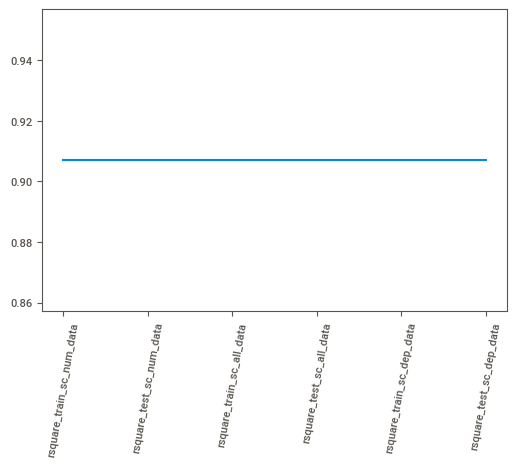

In [306]:
plt.plot(list(rsqaure.keys()),list(rsqaure.values()))
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

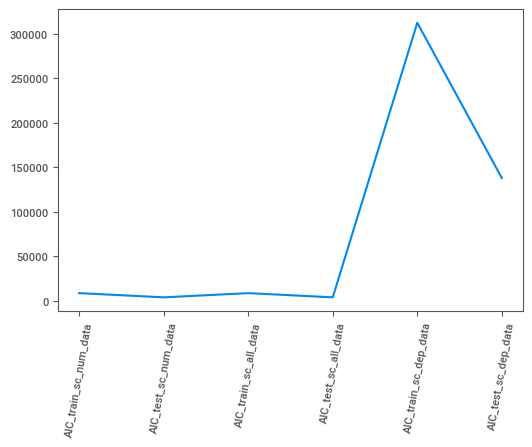

In [307]:
plt.plot(list(AIC.keys()),list(AIC.values()))
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

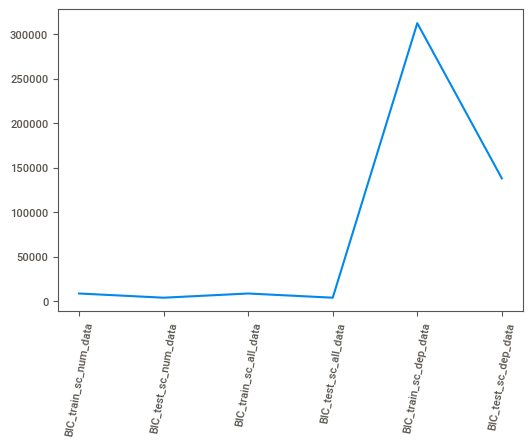

In [308]:
plt.plot(list(BIC.keys()),list(BIC.values()))
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

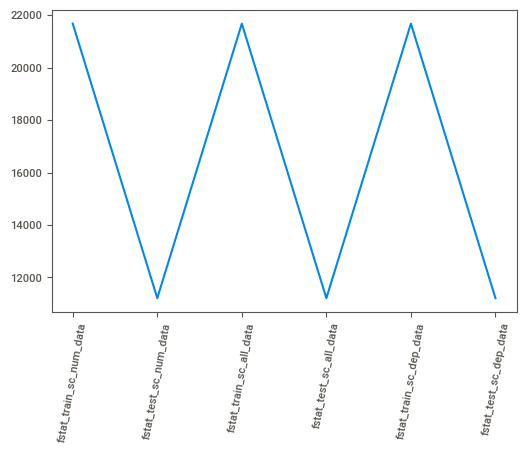

In [309]:
plt.plot(list(fstat.keys()),list(fstat.values()))
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

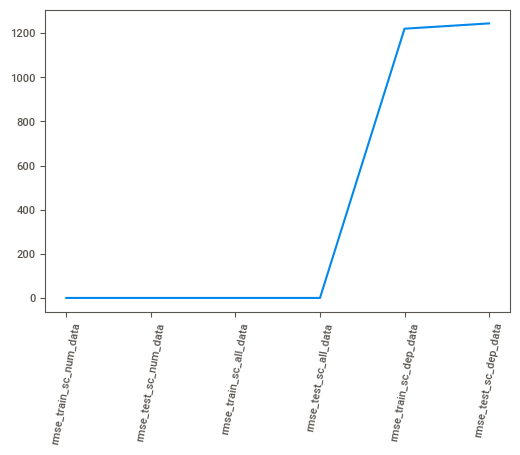

In [310]:
plt.plot(list(rmse.keys()),list(rmse.values()))
plt.xticks(rotation=80)

## Rsqaure is the same for all the different approaches.
## Fstat is same for all the different approaches, 
## AIC ,BIC & RMSE values are increasing when we scale only the dependent variables.

## Again when scaling both dependent and independent variables, we can see everything else remains the same, except for the intercept which becomes 0 when all the variables are scaled.

## Hence the final approach --> scale all variables, dependent and independent.

## Variation Inflation Factor

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 

In [197]:
i=0
for column in X_train.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1929.8979321342135
cut ---> 9.092371137191222
color ---> 5.523392734461949
clarity ---> 12.294155292965149
depth ---> 458.40349860737473
table ---> 430.9751248432251
volume ---> 1941.77913030456


In [198]:
vif = [variance_inflation_factor(X_train_standard.values, ix) for ix in range(X_train.shape[1])] 

In [199]:
i=0
for column in X_train_standard.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 609.4390186631485
cut ---> 1.471861638823729
color ---> 1.1214897697265762
clarity ---> 1.200300400567169
depth ---> 1.5852788632606118
table ---> 1.7027238067779509
volume ---> 604.9112275641579


## Final predictions

#### Please note, standardscaler from approach 2 which is the final appraoch, was run again to perform inverse_transform to get the actual y_predict values.

#### Do not run these cells in sequential orders as it will lead to wrong results with incorrect standardscaler.

In [241]:
y_predict_train=regression_model.predict(X_train_standard)
y_predict_train=pd.DataFrame(sc1.inverse_transform(y_predict_train),columns=['price'],index=train_labels_standard.index)
y_predict_train

price
1336    8999.571584
7994    1235.028814
16909    705.188398
18459   -508.743210
26836   5828.935490
...             ...
23063   7892.997420
21892   2422.439630
24970  14606.476454
22693   5887.245900
11136   2865.267576

[18846 rows x 1 columns]

In [247]:
train_result=pd.concat([X_train,y_predict_train],axis=1)
train_result

carat  cut  color  clarity  depth  table      volume         price
1336    1.50    1      4        3   59.7   61.0  243.568488   8999.571584
7994    0.75    3      0        3   62.9   56.0  118.939392   1235.028814
16909   0.41    3      4        5   60.3   58.0   67.744800    705.188398
18459   0.41    4      3        3   61.7   56.0   68.198104   -508.743210
26836   1.00    4      5        4   61.9   56.0  163.113405   5828.935490
...      ...  ...    ...      ...    ...    ...         ...           ...
23063   1.51    3      2        2   60.9   56.0  238.961448   7892.997420
21892   0.52    4      6        5   61.8   56.0   84.892600   2422.439630
24970   2.14    4      2        3   63.0   55.0  352.388025  14606.476454
22693   1.07    2      2        5   61.5   57.0  176.849946   5887.245900
11136   0.72    1      3        5   59.7   60.5  117.535840   2865.267576

[18846 rows x 8 columns]

In [242]:
y_predict_test=regression_model.predict(X_test_standard)
y_predict_test=pd.DataFrame(sc1.inverse_transform(y_predict_test),columns=['price'],index=test_labels_standard.index)
y_predict_test

price
20799  7996.672233
4497   2756.464027
22248  6147.866161
24428   -71.230415
19875   988.260861
...            ...
4931   1844.397732
13926  2812.008387
4096   2011.758676
20244  8535.331896
26643 -1015.795408

[8077 rows x 1 columns]

In [237]:
test_labels

20799    6511
4497     2670
22248    4368
24428     911
19875    1015
         ... 
4931      993
13926    2404
4096     1055
20244    8001
26643     593
Name: price, Length: 8077, dtype: int64

In [248]:
test_result=pd.concat([X_test,y_predict_test],axis=1)
test_result

carat  cut  color  clarity  depth  table      volume        price
20799   1.51    1      0        4   64.1   61.0  236.809840  7996.672233
4497    0.72    2      4        4   63.4   58.0  115.939440  2756.464027
22248   1.20    4      2        3   61.1   57.0  196.883910  6147.866161
24428   0.44    4      2        4   61.6   56.0   72.507482   -71.230415
19875   0.41    4      6        4   62.3   55.0   68.087934   988.260861
...      ...  ...    ...      ...    ...    ...         ...          ...
4931    0.38    4      3        8   61.7   55.0   63.432610  1844.397732
13926   0.72    2      4        4   62.2   59.0  117.621504  2812.008387
4096    0.41    4      3        8   61.6   57.0   66.386475  2011.758676
20244   1.52    0      2        4   65.3   58.0  235.727100  8535.331896
26643   0.31    3      3        4   60.4   58.0   51.614108 -1015.795408

[8077 rows x 8 columns]

In [311]:
output=pd.DataFrame(data=[0.907,8780,8843,21680,0.3053],columns=['Train'],index=['RSqaure','AIC','BIC','FStat','RMSE'])

In [313]:
output['Test']=[0.907,4071,4127,11210,0.3112]

In [314]:
output

Train        Test
RSqaure      0.9070      0.9070
AIC       8780.0000   4071.0000
BIC       8843.0000   4127.0000
FStat    21680.0000  11210.0000
RMSE         0.3053      0.3112

In [315]:
pd.DataFrame(data=[0.8817,0.2152,0.1714,0.1395,0.0366],index=['Volume','Clarity','Carat','Color','Cut'],
             columns=['Co-efficients'])

Co-efficients
Volume          0.8817
Clarity         0.2152
Carat           0.1714
Color           0.1395
Cut             0.0366

# Question - 2 

In [855]:
df2=pd.read_csv('Holiday_Package.csv')

In [856]:
df2['Holliday_Package'].value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

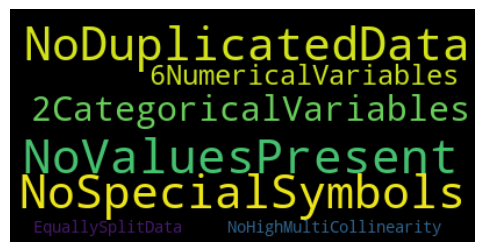

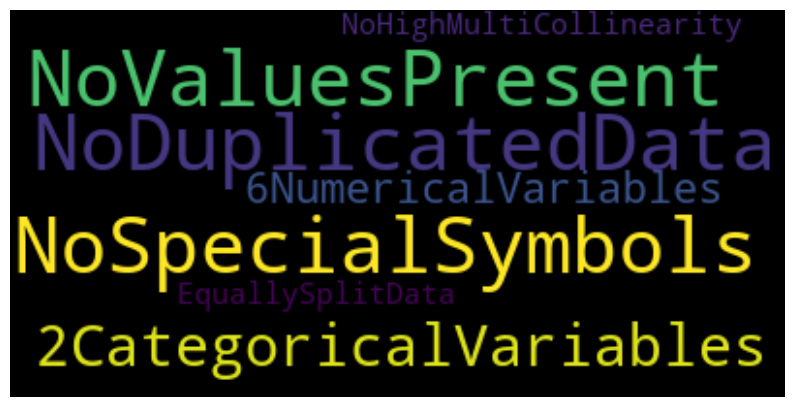

In [857]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

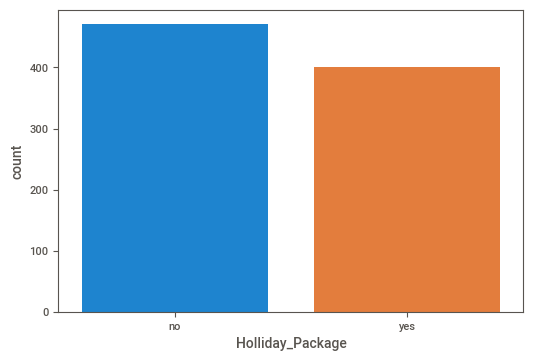

In [858]:
sns.countplot(df2['Holliday_Package'])

In [859]:
df2.head()

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0           1               no   48412   30     8                  1   
1           2              yes   37207   45     8                  0   
2           3               no   58022   46     9                  0   
3           4               no   66503   31    11                  2   
4           5               no   66734   44    12                  0   

   no_older_children foreign  
0                  1      no  
1                  1      no  
2                  0      no  
3                  0      no  
4                  2      no

In [860]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [861]:
df2.describe(include='all')

Unnamed: 0 Holliday_Package         Salary         age        educ  \
count   872.000000              872     872.000000  872.000000  872.000000   
unique         NaN                2            NaN         NaN         NaN   
top            NaN               no            NaN         NaN         NaN   
freq           NaN              471            NaN         NaN         NaN   
mean    436.500000              NaN   47729.172018   39.955275    9.307339   
std     251.869014              NaN   23418.668531   10.551675    3.036259   
min       1.000000              NaN    1322.000000   20.000000    1.000000   
25%     218.750000              NaN   35324.000000   32.000000    8.000000   
50%     436.500000              NaN   41903.500000   39.000000    9.000000   
75%     654.250000              NaN   53469.500000   48.000000   12.000000   
max     872.000000              NaN  236961.000000   62.000000   21.000000   

        no_young_children  no_older_children foreign  
count          872.000000         872.000000     872  
unique                NaN                NaN       2  
top                   NaN                NaN      no  
freq                  NaN                NaN     656  
mean             0.311927           0.982798     NaN  
std              0.612870           1.086786     NaN  
min              0.000000           0.000000     NaN  
25%              0.000000           0.000000     NaN  
50%              0.000000           1.000000     NaN  
75%              0.000000           2.000000     NaN  
max              3.000000           6.000000     NaN

In [862]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [863]:
df2.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0               no   48412   30     8                  1                  1   
1              yes   37207   45     8                  0                  1   
2               no   58022   46     9                  0                  0   
3               no   66503   31    11                  2                  0   
4               no   66734   44    12                  0                  2   

  foreign  
0      no  
1      no  
2      no  
3      no  
4      no

## No Null Values

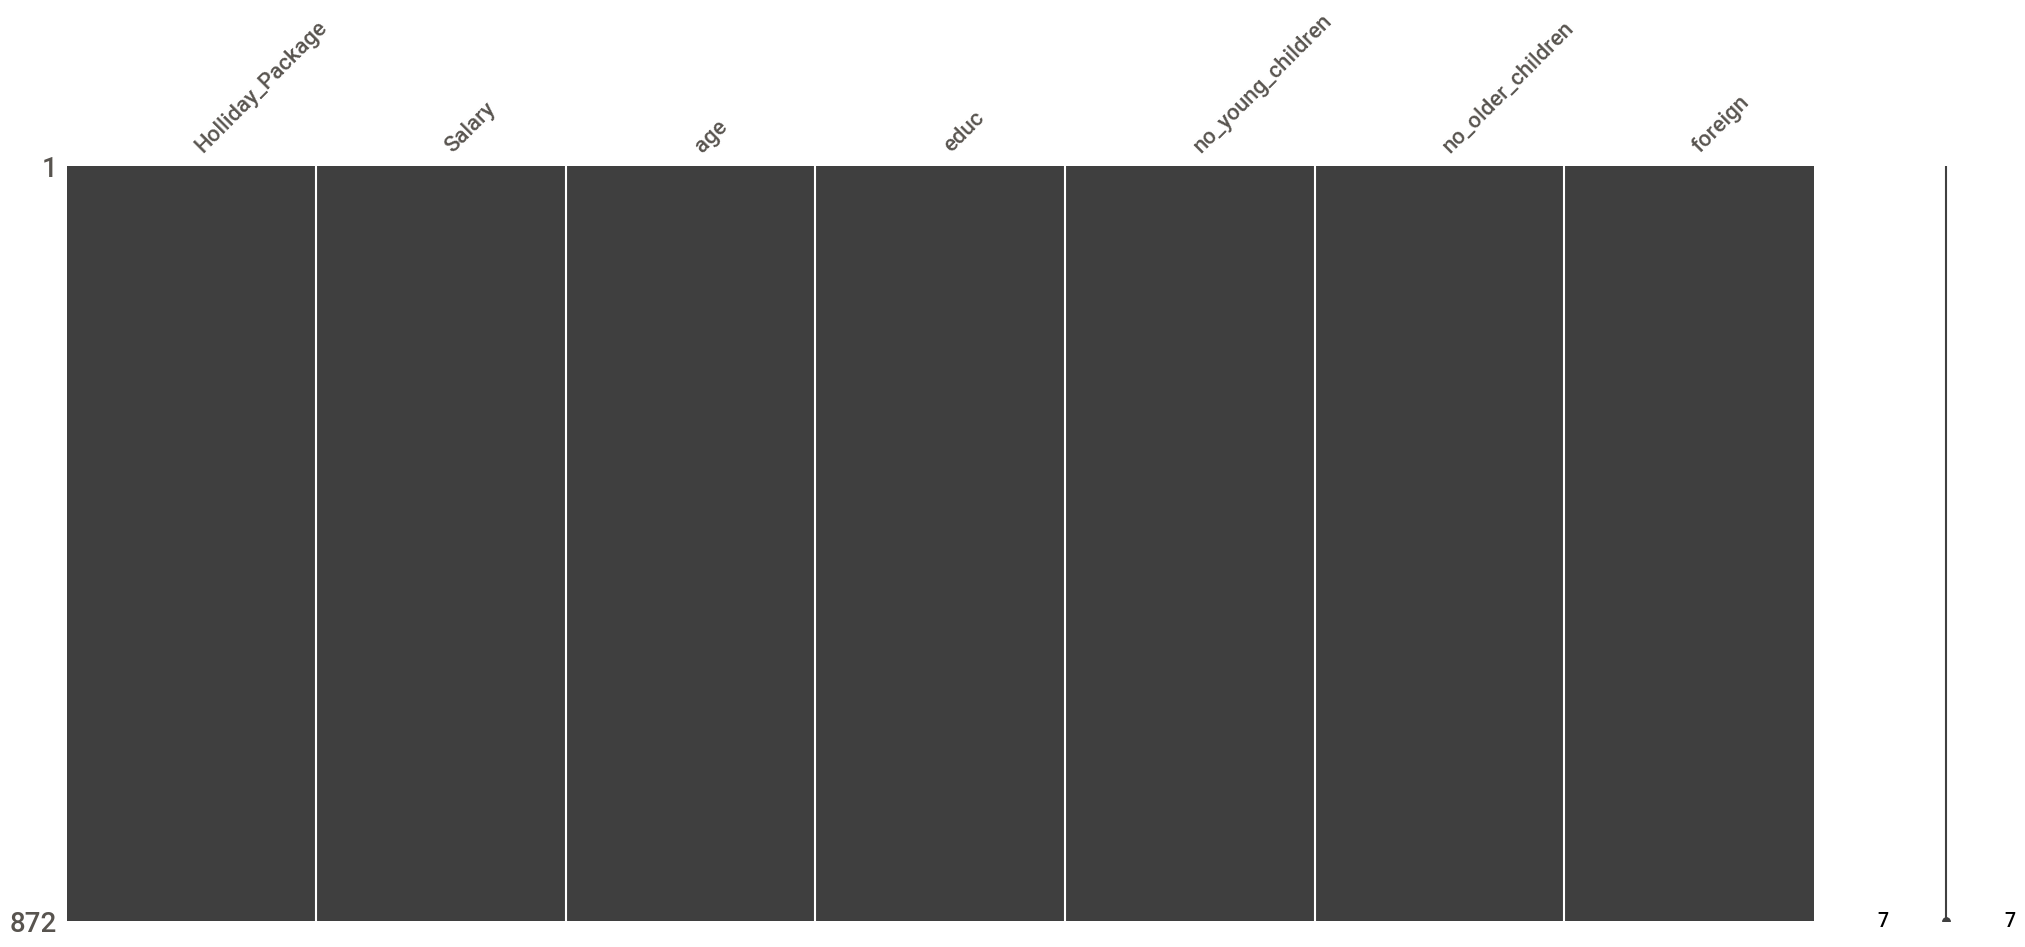

In [864]:
msno.matrix(df2)

In [865]:
df2.isna().sum().sum()

0

In [866]:
df2.duplicated().sum()

0

In [867]:
df2.isnull().sum().sum()

0

## No zero values as evident from describe() function output

## Skewness check

In [868]:
import scipy.stats as stats
pd.DataFrame(stats.skew(df2[['Salary','age','educ','no_young_children','no_older_children']]),
             index=['Salary','age','educ','no_young_children','no_older_children'],columns=['Amount of Skewness'])

Amount of Skewness
Salary                       3.097875
age                          0.146160
educ                        -0.045423
no_young_children            1.943165
no_older_children            0.952310

## Univariate and BiVariate Analysis

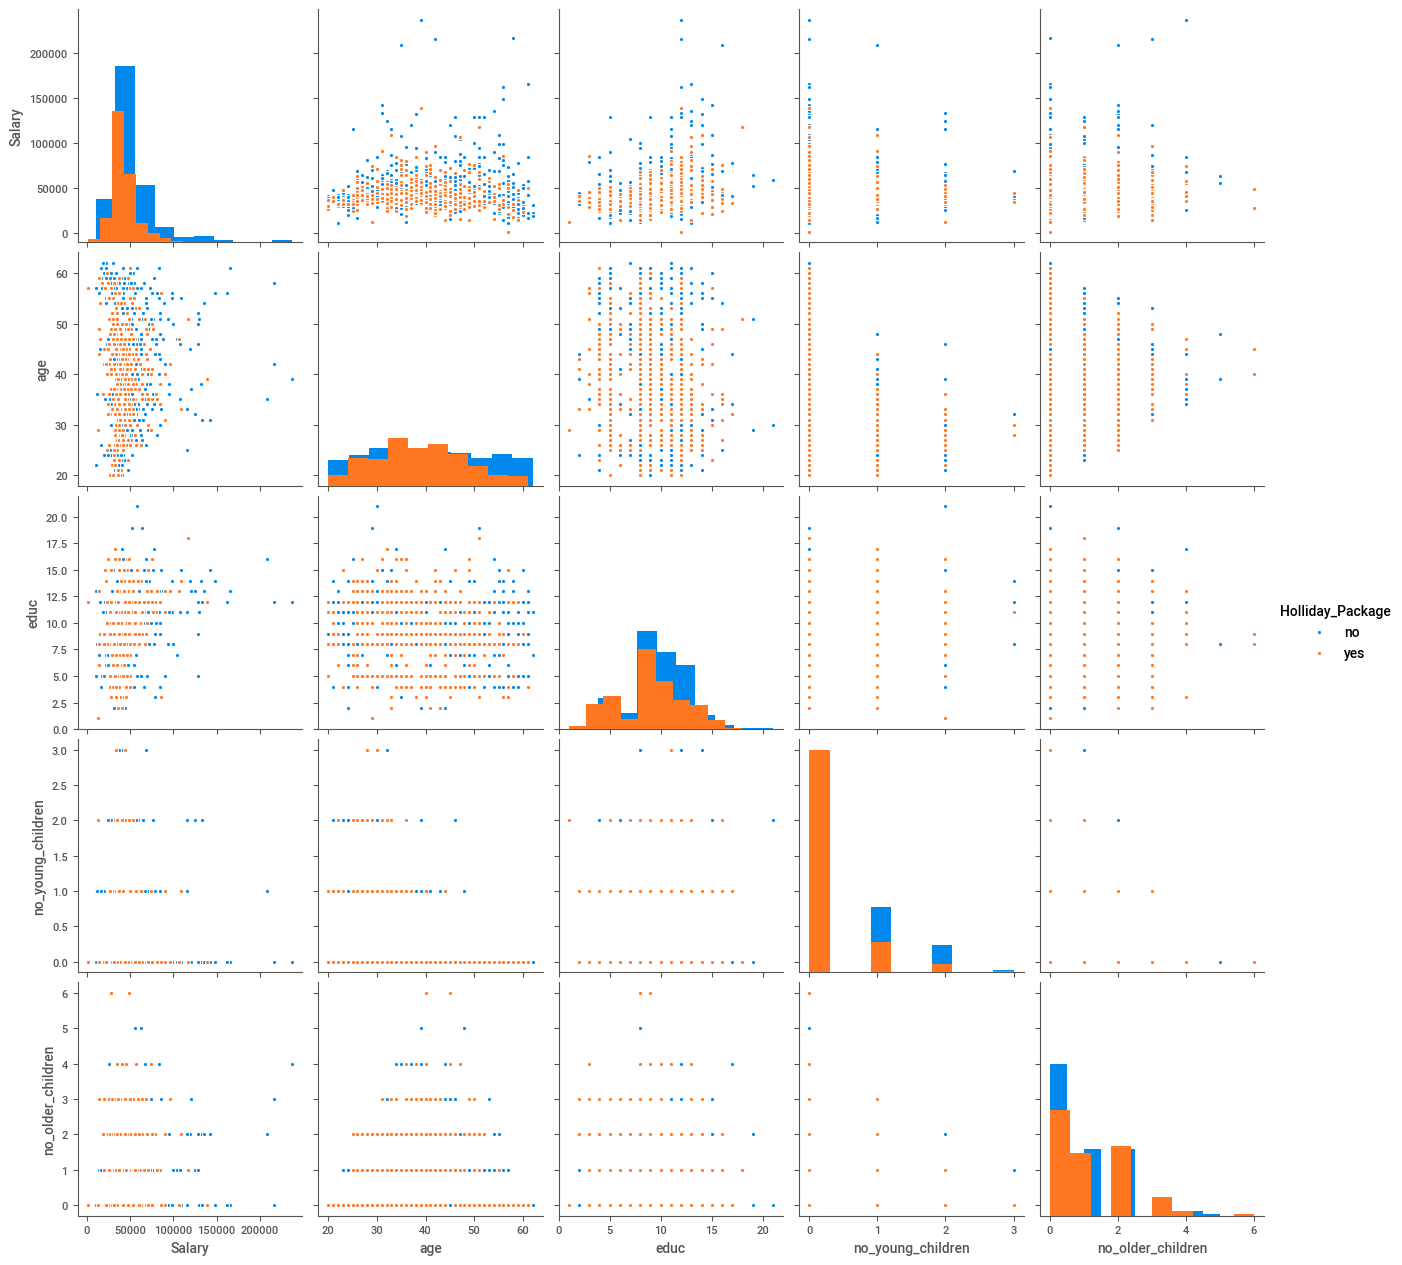

In [869]:
sns.pairplot(data=df2,hue='Holliday_Package',diag_kind='hist')

### Salary

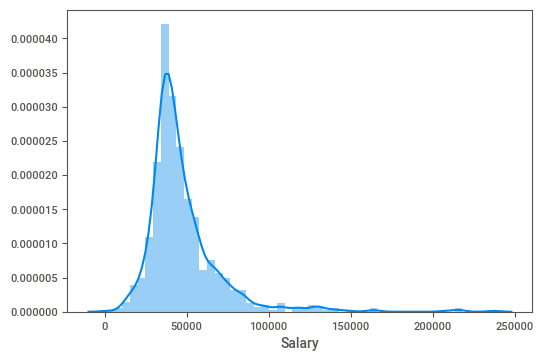

In [870]:
sns.distplot(df2.Salary)

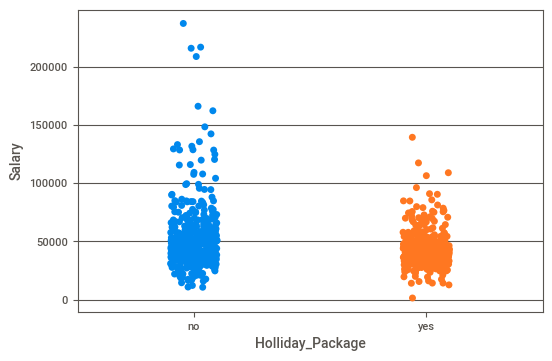

In [871]:
plt.grid()
sns.stripplot(x=df2['Holliday_Package'],y=df2['Salary'])

#### No one above the salary of 1,50,000 opted for the holiday package

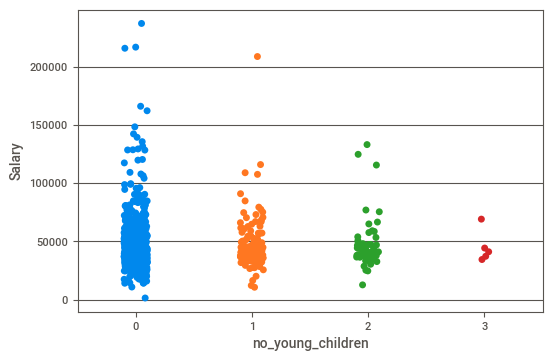

In [872]:
plt.grid()
sns.stripplot(x=df2['no_young_children'],y=df2['Salary'])

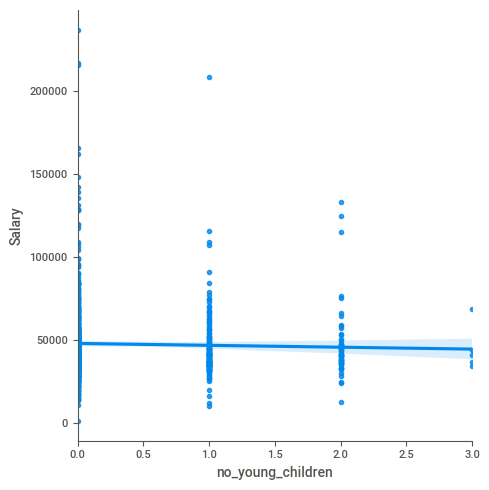

In [873]:
sns.lmplot(x='no_young_children',y='Salary',data=df2)

#### Negative correlation
#### higher the salary, lower the number of young children. No one above 1,50,000 salary had more than 1 young child

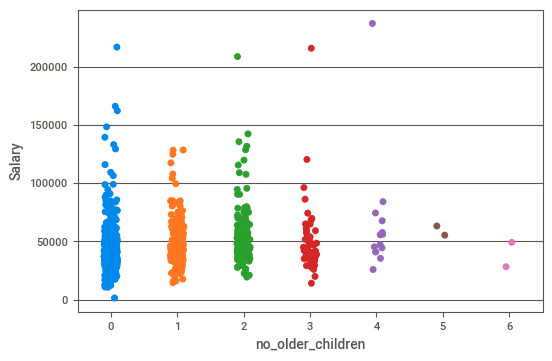

In [874]:
plt.grid()
sns.stripplot(x=df2['no_older_children'],y=df2['Salary'])

## age

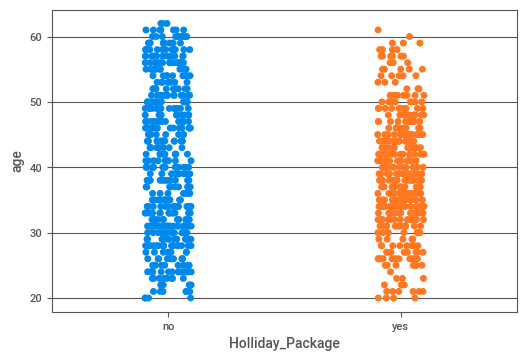

In [875]:
plt.grid()
sns.stripplot(x=df2['Holliday_Package'],y=df2['age'])

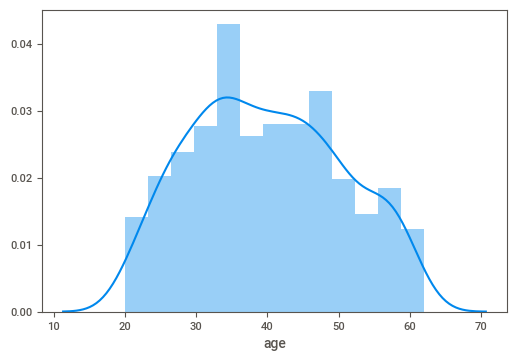

In [876]:
sns.distplot(df2.age)

## educ

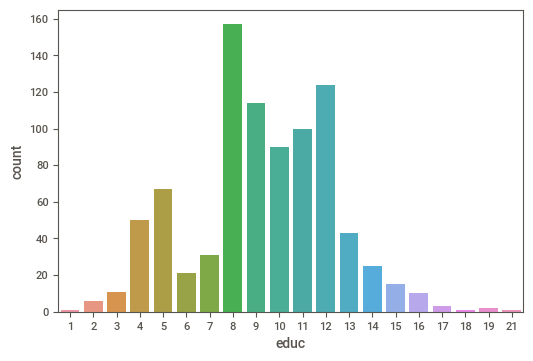

In [877]:
sns.countplot(df2.educ)

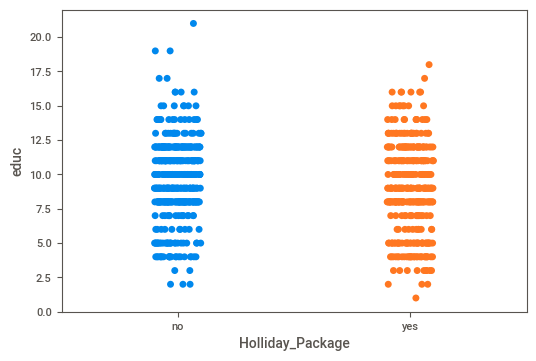

In [881]:
sns.stripplot(x=df2['Holliday_Package'],y=df2['educ'])

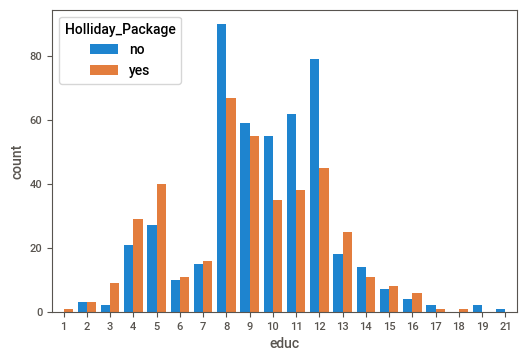

In [883]:
sns.countplot(df2.educ,hue=df2.Holliday_Package)

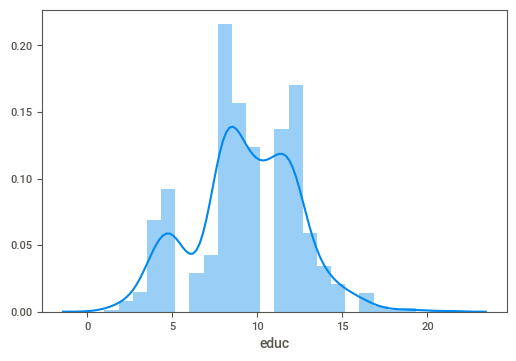

In [823]:
sns.distplot(df2.educ)

### no_young_children

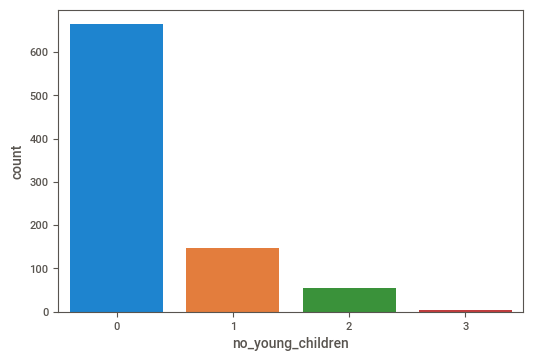

In [824]:
sns.countplot(df2.no_young_children)

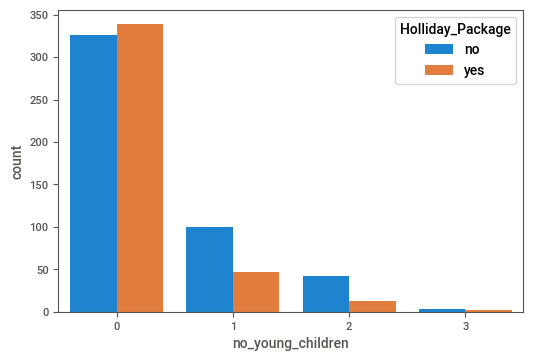

In [825]:
sns.countplot(df2.no_young_children,hue=df2.Holliday_Package)

### Most people who had no young children opted for holiday package while people with higher number of young children did not opt for holiday package

## no_older_children

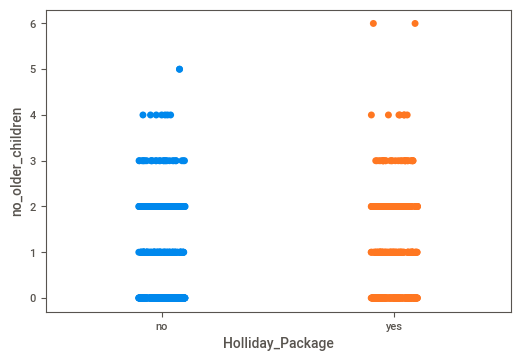

In [826]:
sns.stripplot(x=df2['Holliday_Package'],y=df2['no_older_children'],jitter=True)

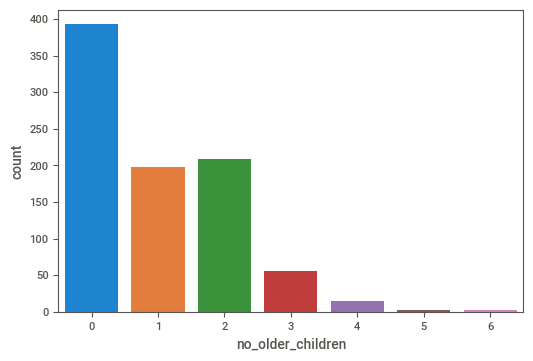

In [827]:
sns.countplot(df2.no_older_children)

#### Everyone with 5 older children opted out of the holiday package while everyone with 6 older children opted in for the package

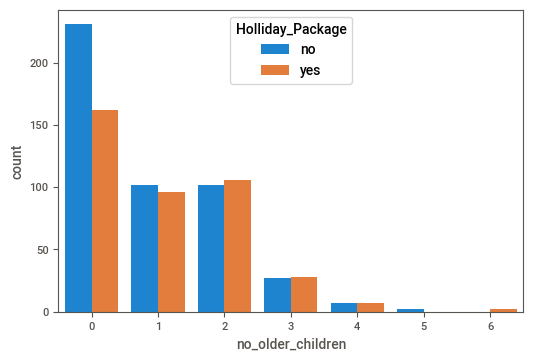

In [828]:
sns.countplot(df2.no_older_children,hue=df2.Holliday_Package)

### Most people with no older children did not  opt for holiday package, while people having 1 to 4 older children opted for holiday package in 50:50 ratio. For people having 5 older children, no one opted for the holiday package, whle people having 6 children all of them opted for the holiday package

In [829]:
df2.query('no_older_children >= 5')

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
95                no   63102   48     8                  0                  5   
186               no   55269   39     8                  0                  5   
230              yes   49052   45     8                  0                  6   
435              yes   28158   40     9                  0                  6   

    foreign  
95       no  
186      no  
230      no  
435      no

## foriegn

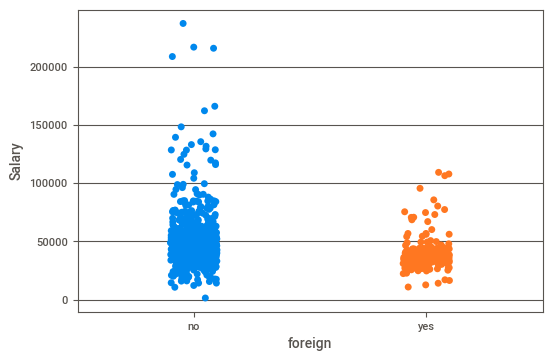

In [830]:
plt.grid()
sns.stripplot(x=df2['foreign'],y=df2['Salary'])

### foreigner employees are having lesser salary comparitively

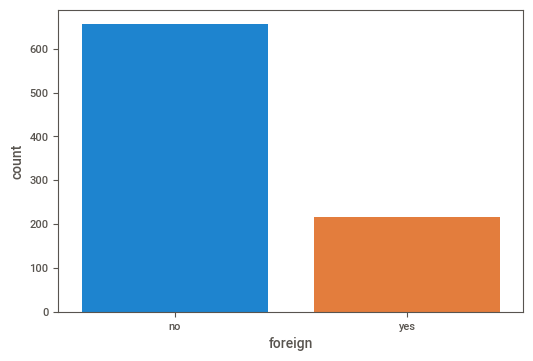

In [831]:
sns.countplot(df2.foreign)

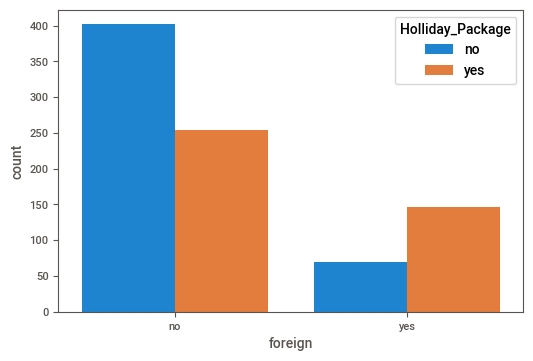

In [832]:
sns.countplot(df2.foreign,hue=df2.Holliday_Package)

#### A lot more foreigner employees opted for the holiday package compared to the native employees

# Outlier Analysis

In [833]:
column=['Salary', 'age', 'educ', 'no_young_children','no_older_children']

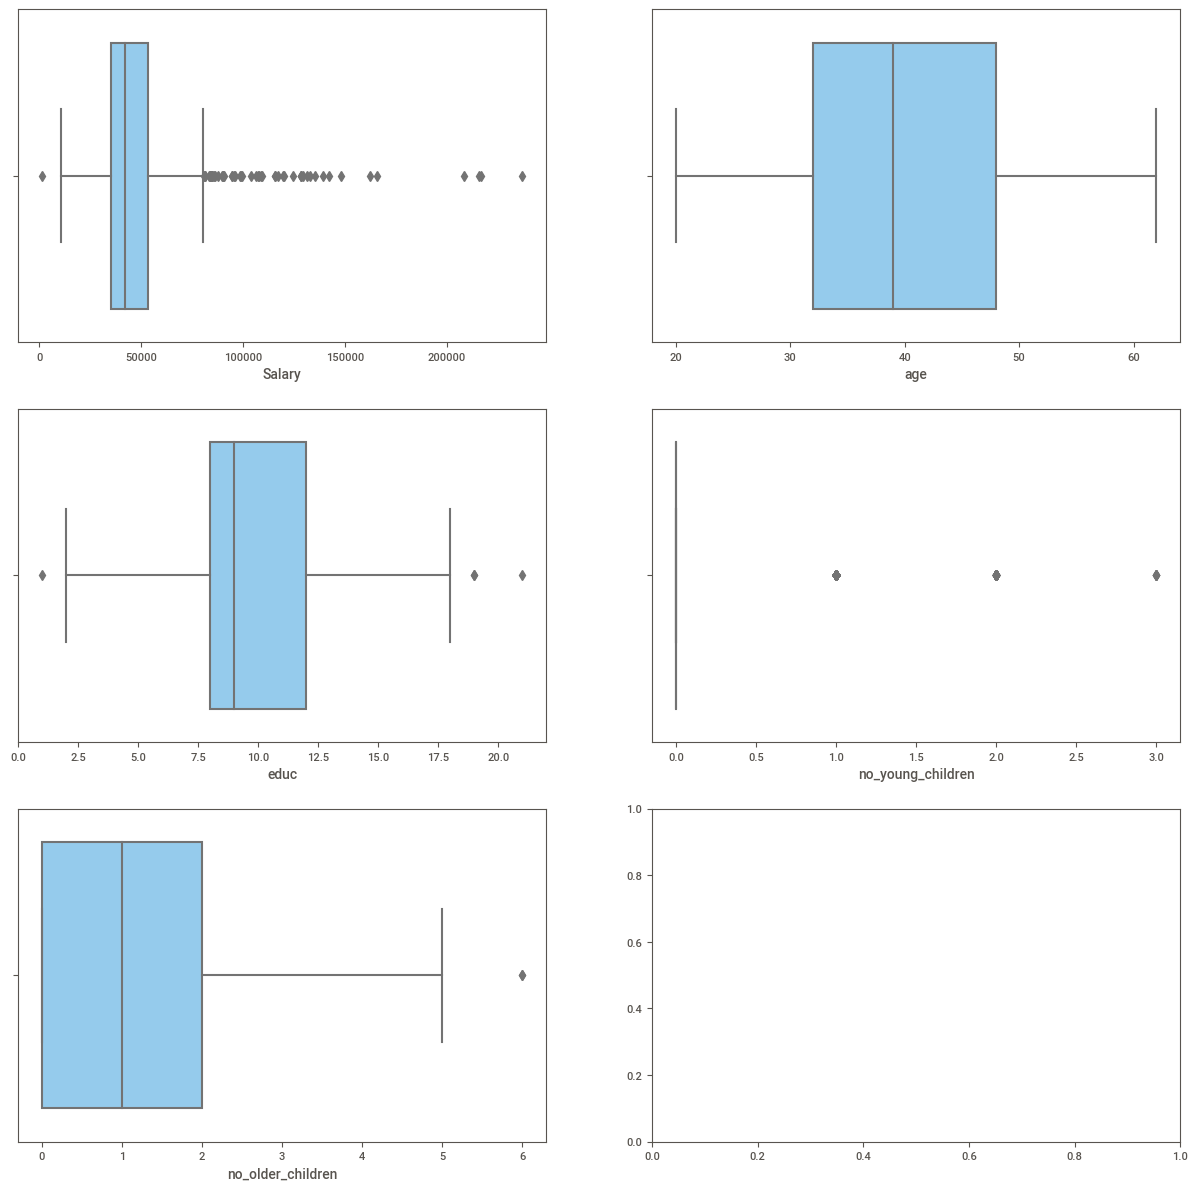

In [834]:
fig, axes = plt.subplots(figsize = (15, 15), nrows = 3, ncols =  2)

for i, col in enumerate(column):
    sns.boxplot(df2[col], orient = 'h', ax = axes[i // 2, i % 2], color = 'lightskyblue')

In [835]:
# All are valid numerical values
df2[df2.applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []

## SweetViz Library

In [332]:
my_report  = sw.analyze([df2,'SweetViz_Report_Problem2'],target_feat='Holliday_Package')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [333]:
my_report.show_html('SweetViz_Report_Problem2.html')

## Check for multicollinearity

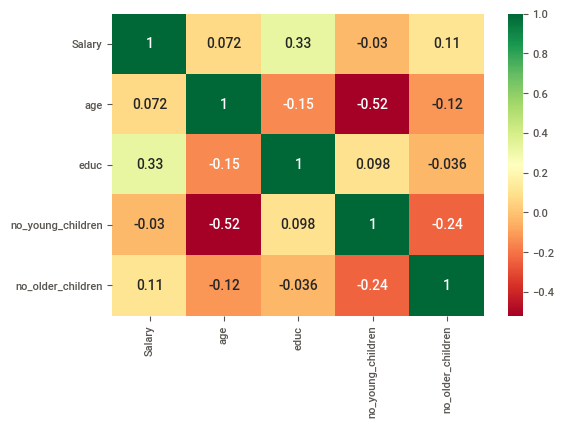

In [836]:
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn')

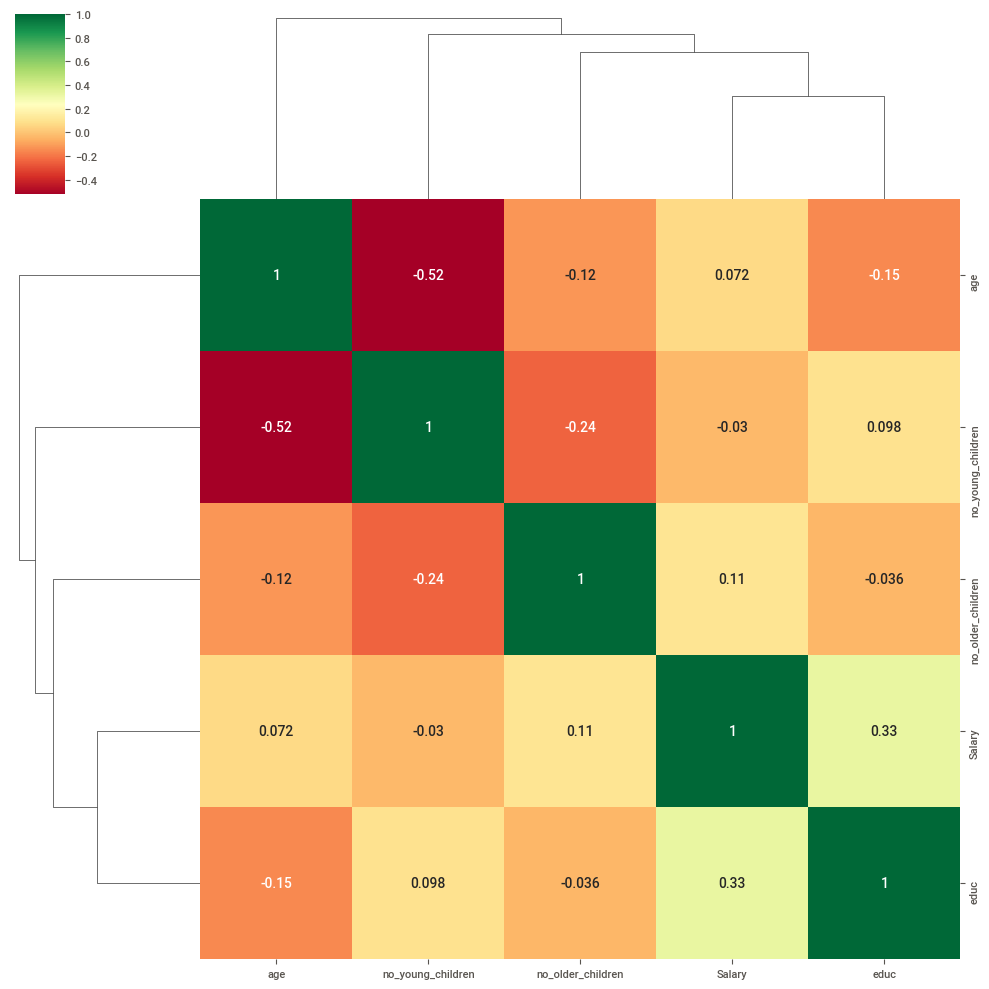

In [837]:
sns.clustermap(df2.corr(),annot=True,cmap='RdYlGn')

### No high multi-collinearity observed.

## Encoding data

In [838]:
from sklearn.preprocessing import LabelEncoder

In [839]:
lbl=LabelEncoder()

In [840]:
df2['Holliday_Package']=lbl.fit_transform(df2['Holliday_Package'])

In [841]:
df2['foreign']=lbl.fit_transform(df2['foreign'])

In [842]:
df2.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0                 0   48412   30     8                  1                  1   
1                 1   37207   45     8                  0                  1   
2                 0   58022   46     9                  0                  0   
3                 0   66503   31    11                  2                  0   
4                 0   66734   44    12                  0                  2   

   foreign  
0        0  
1        0  
2        0  
3        0  
4        0

In [843]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int32
dtypes: int32(2), int64(5)
memory usage: 41.0 KB


### Scaling not required as per project notes

## Outlier checks

In [844]:
for j in ['Salary','age','educ','no_young_children','no_older_children']:
    outlier_list=[]
    q1,q3=np.nanpercentile(df2[j],[25,75])
    q1,q3
    iqr=q3-q1
    iqr
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    upper,lower
    for i in df2[j]:
        if i < lower or i > upper:
            outlier_list.append(i)
    print(color.BOLD + "Variable: {}".format(j) +color.END)
    print("q1,q3,iqr,lower,upper: {} {} {} {} {}".format(q1,q3,iqr,lower,upper))
    print("Outliers: {}".format(np.sort(outlier_list)))
    print("Outlier Count: {}".format(len(outlier_list)))

Variable: Salary
q1,q3,iqr,lower,upper: 35324.0 53469.5 18145.5 8105.75 80687.75
Outliers: [  1322  80764  81148  81307  83203  83693  83859  84031  84103  84482
  84592  84656  84673  84682  84882  85549  86113  87897  89759  90272
  90324  90827  94344  94490  95460  96072  98668  98870  99423 104085
 106302 107442 107741 108836 109150 115431 115842 117276 119644 120228
 124627 128276 128381 128548 129262 131576 132984 135489 139253 142183
 148221 162024 165895 208561 215675 216630 236961]
Outlier Count: 57
Variable: age
q1,q3,iqr,lower,upper: 32.0 48.0 16.0 8.0 72.0
Outliers: []
Outlier Count: 0
Variable: educ
q1,q3,iqr,lower,upper: 8.0 12.0 4.0 2.0 18.0
Outliers: [ 1 19 19 21]
Outlier Count: 4
Variable: no_young_children
q1,q3,iqr,lower,upper: 0.0 0.0 0.0 0.0 0.0
Outliers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### No significant outliers found. Outliers identified above are genuine valid data hence are not treated

# Train Test Split

In [845]:
X=df2.drop('Holliday_Package',axis=1)
y=df2.pop('Holliday_Package')

In [846]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

## Using Logit function from statsmodel library to get the coefficients for better understanding

In [850]:
import statsmodels.api as sm 

In [851]:
log_reg = sm.Logit(train_labels, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.611071
         Iterations 5


In [852]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Aug 2020   Pseudo R-squ.:                  0.1145
Time:                        22:24:32   Log-Likelihood:                -372.75
converged:                       True   LL-Null:                       -420.93
Covariance Type:            nonrobust   LLR p-value:                 3.101e-19
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Salary            -1.476e-05   4.66e-06     -3.167      0.002   -2.39e-05   -5.63e-06
age                  -0.0240      0.006     -3.795      0.000      -0.036      -0.012
educ                  0.

In [853]:
log_reg.params

Salary              -0.000015
age                 -0.024039
educ                 0.136074
no_young_children   -0.982400
no_older_children    0.087721
foreign              1.566435
dtype: float64

## Applying Logistic regression using sklearn

In [847]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,500,1000]}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

In [848]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [849]:
grid_search.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [637]:
param_grid={'penalty':['l1'],
      'solver':['liblinear'],
      'tol':[0.00001,0.000001],
      'max_iter':[300,400,500,600,700]}

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

In [638]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [300, 400, 500, 600, 700],
                         'penalty': ['l1'], 'solver': ['liblinear'],
                         'tol': [1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [639]:
grid_search.best_params_

{'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

In [640]:
param_grid={'penalty':['l1'],
      'solver':['liblinear'],
      'tol':[0.00001,0.000001],
      'max_iter':[350,400,450]}

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

In [641]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [350, 400, 450], 'penalty': ['l1'],
                         'solver': ['liblinear'], 'tol': [1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [642]:
grid_search.best_params_

{'max_iter': 350, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}

In [643]:
param_grid={'penalty':['l1'],
      'solver':['liblinear'],
      'tol':[0.00001,0.000001],
      'max_iter':[300,325,350,375,400]}

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

In [644]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [300, 325, 350, 375, 400],
                         'penalty': ['l1'], 'solver': ['liblinear'],
                         'tol': [1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [645]:
grid_search.best_params_

{'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}

In [646]:
param_grid={'penalty':['l1'],
      'solver':['liblinear'],
      'tol':[0.00001,0.000001],
      'max_iter':[300,305,310,315,320,325,330,335,340,345,350]}

grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3)

In [728]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [300, 305, 310, 315, 320, 325, 330, 335,
                                      340, 345, 350],
                         'penalty': ['l1'], 'solver': ['liblinear'],
                         'tol': [1e-05, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [729]:
grid_search.best_params_

{'max_iter': 325, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

In [730]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=325,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-05, verbose=0,
                   warm_start=False)

In [731]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [732]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


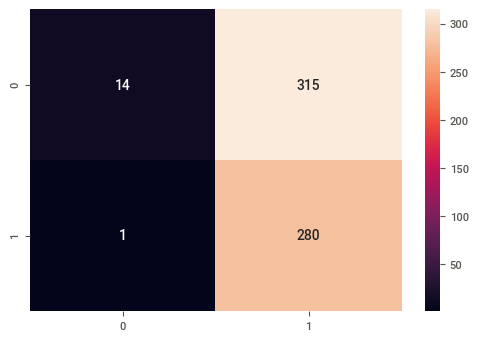

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


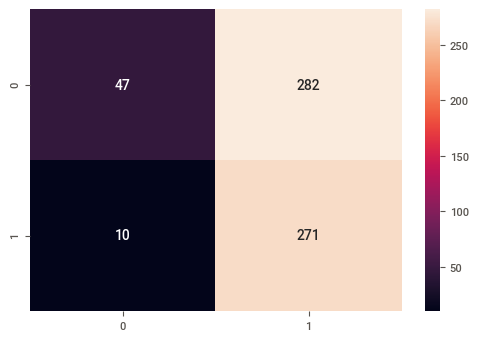

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


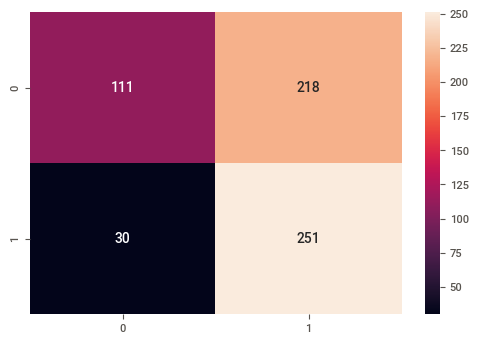

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


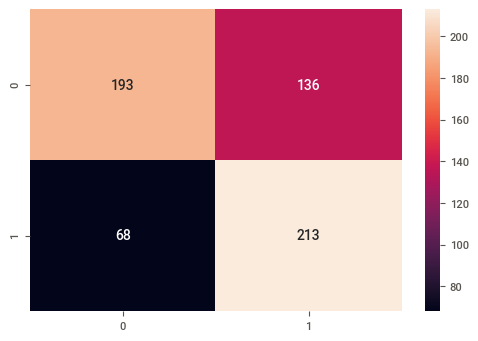

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


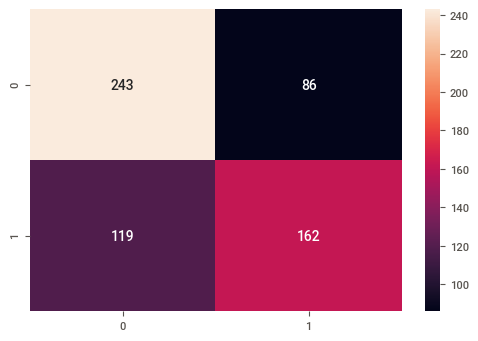

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


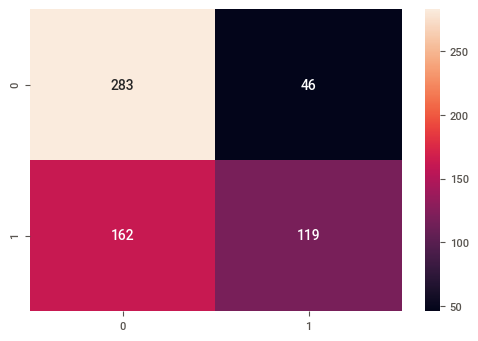

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


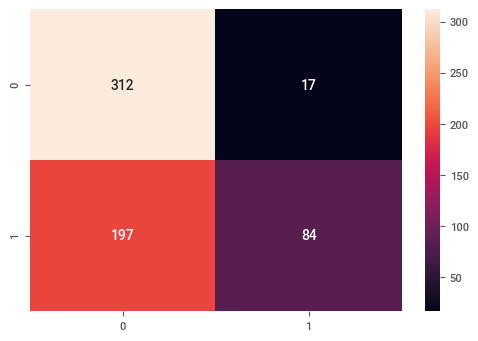

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


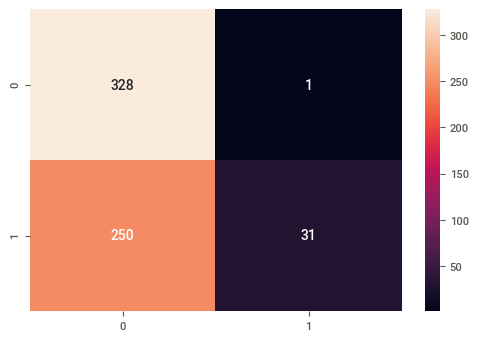

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


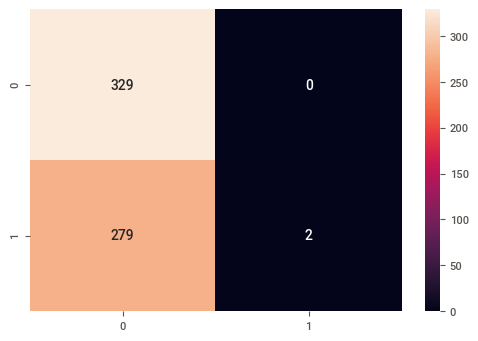

In [747]:
from sklearn import metrics,model_selection
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(train_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.4695
F1 Score 0.6332 

Confusion Matrix


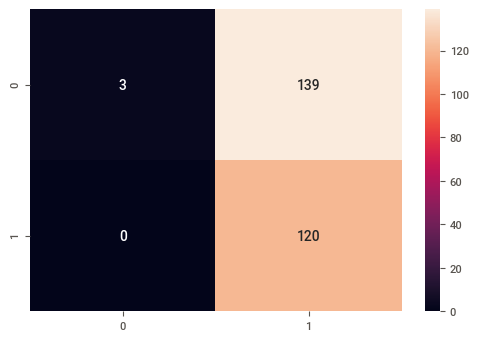

0.2 

Accuracy Score 0.5038
F1 Score 0.6448 

Confusion Matrix


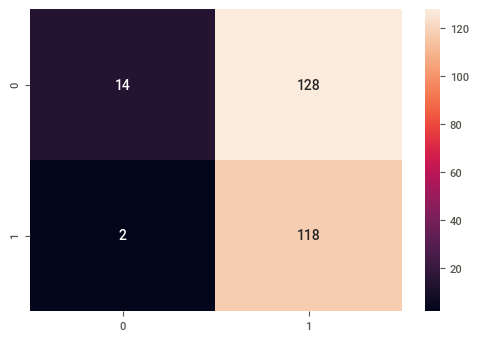

0.3 

Accuracy Score 0.5763
F1 Score 0.6606 

Confusion Matrix


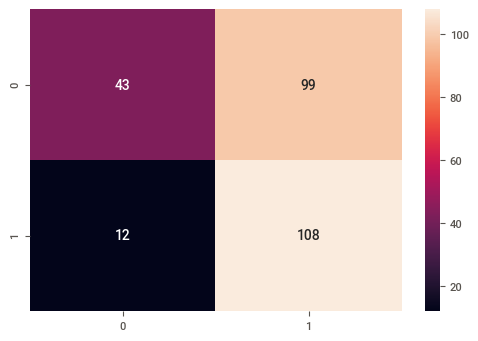

0.4 

Accuracy Score 0.645
F1 Score 0.6517 

Confusion Matrix


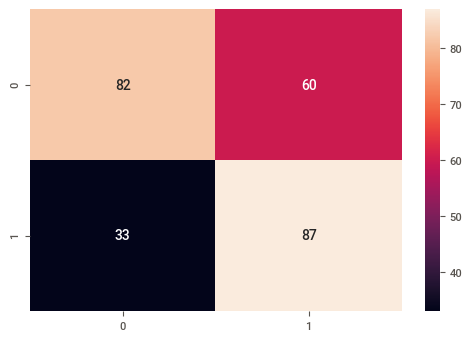

0.5 

Accuracy Score 0.6412
F1 Score 0.5566 

Confusion Matrix


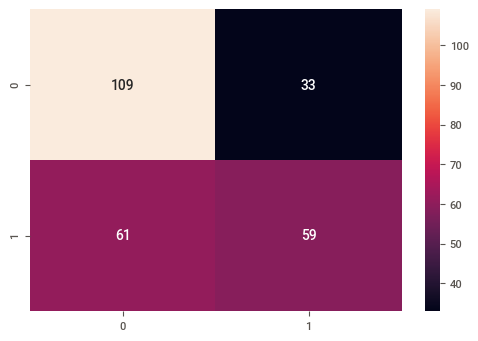

0.6 

Accuracy Score 0.6336
F1 Score 0.4894 

Confusion Matrix


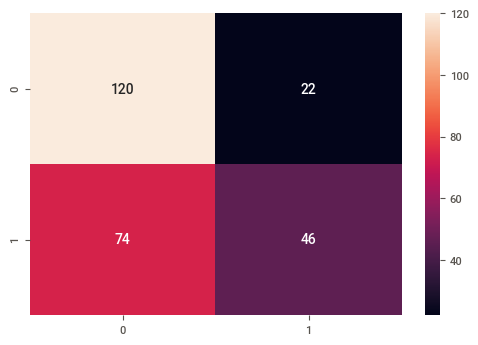

0.7 

Accuracy Score 0.5992
F1 Score 0.3137 

Confusion Matrix


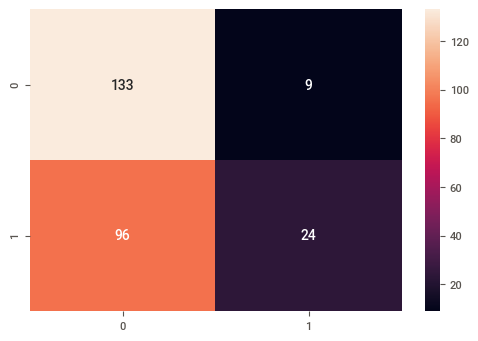

0.8 

Accuracy Score 0.5725
F1 Score 0.1515 

Confusion Matrix


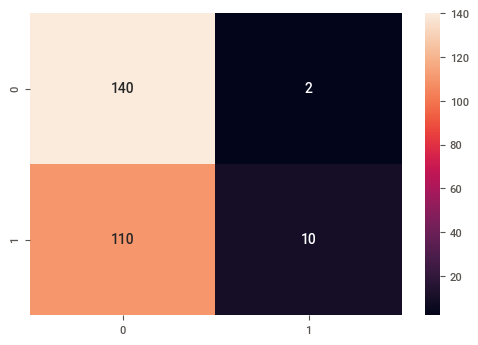

0.9 

Accuracy Score 0.5458
F1 Score 0.0165 

Confusion Matrix


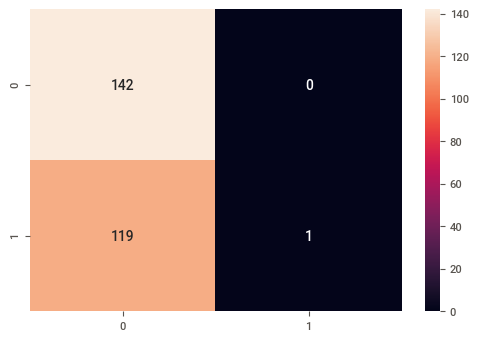

In [748]:
from sklearn import metrics,model_selection
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(test_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(test_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(test_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [759]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [760]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [761]:
accuracy_score(train_labels,ytrain_predict)

0.6672131147540984

In [762]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



In [763]:
accuracy_score(test_labels,ytest_predict)

0.6603053435114504

In [764]:
pd.Series(ytrain_predict).value_counts()

0    368
1    242
dtype: int64

In [765]:
train_labels.value_counts()

0    329
1    281
Name: Holliday_Package, dtype: int64

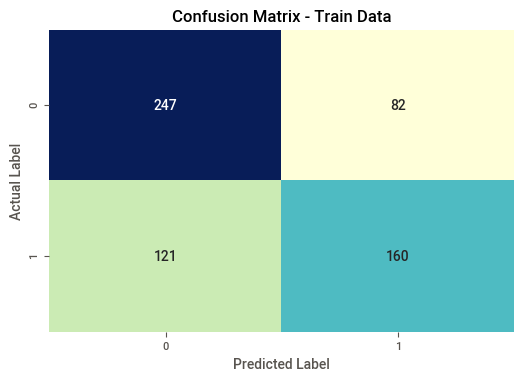

In [766]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [767]:
pd.Series(ytest_predict).value_counts()

0    167
1     95
dtype: int64

In [768]:
test_labels.value_counts()

0    142
1    120
Name: Holliday_Package, dtype: int64

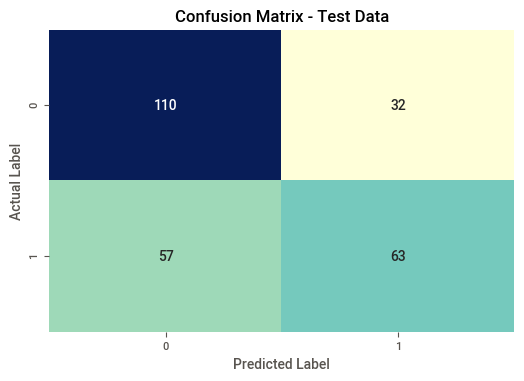

In [769]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()


AUC: 0.735


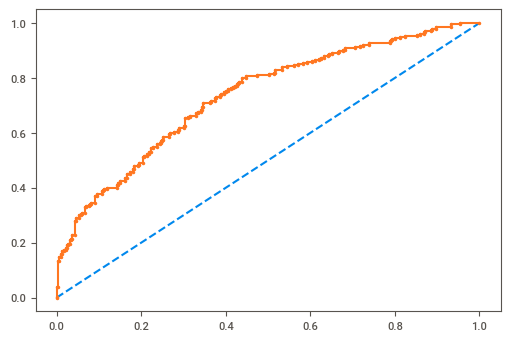

In [770]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.718


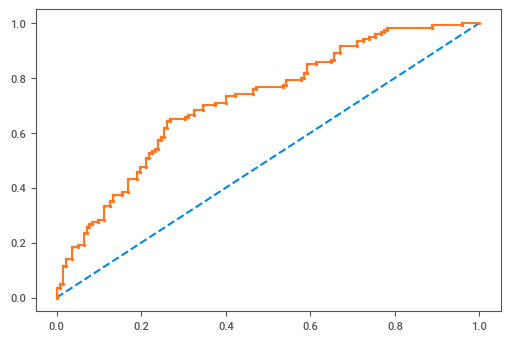

In [771]:
# AUC and ROC for the testing data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Applying LDA

In [772]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_param_grid = {"solver" : ['lsqr', 'eigen'],
              "tol" : [0.0001,0.0002,0.0003]}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = lda, param_grid = lda_param_grid, cv = 3)

In [773]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [774]:
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.0001}

In [775]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,train_labels)
model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [776]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [777]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


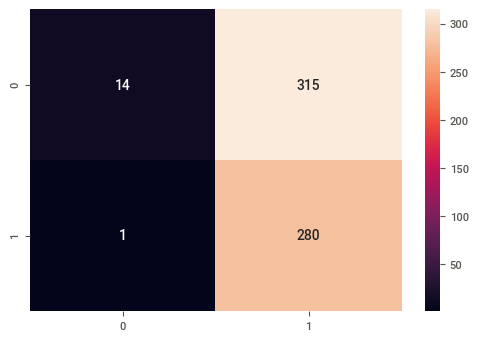

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


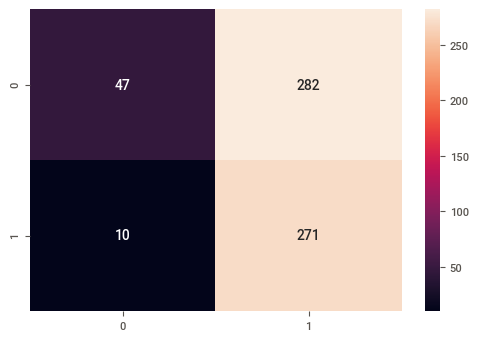

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


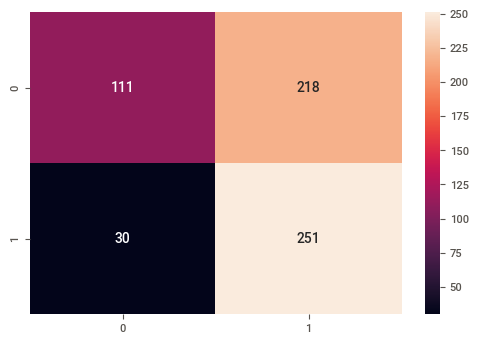

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


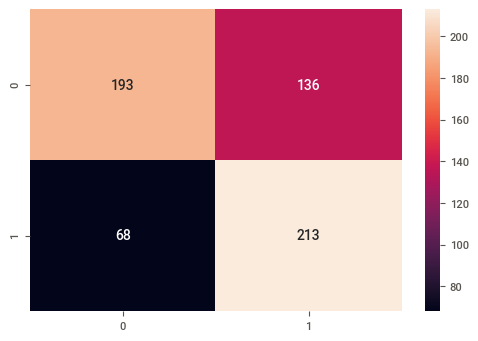

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


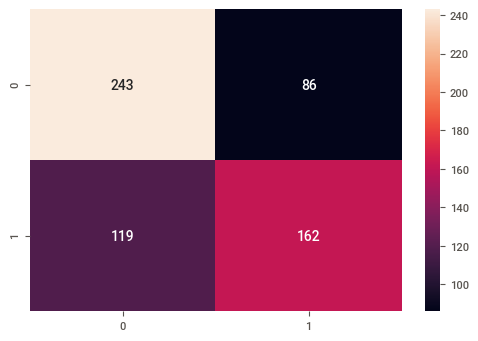

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


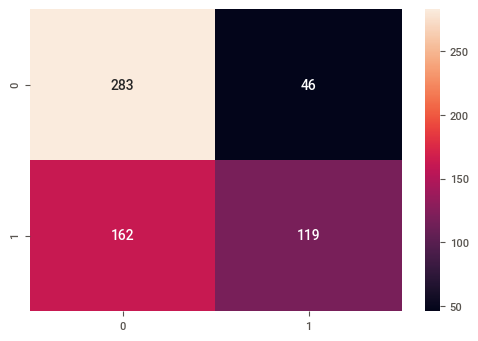

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


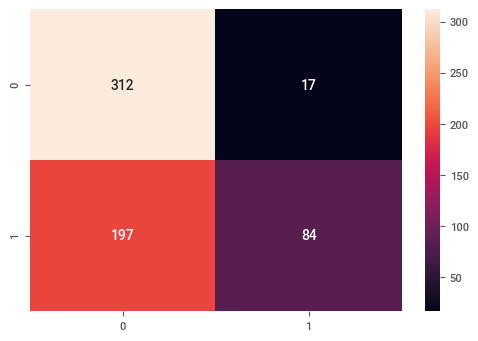

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


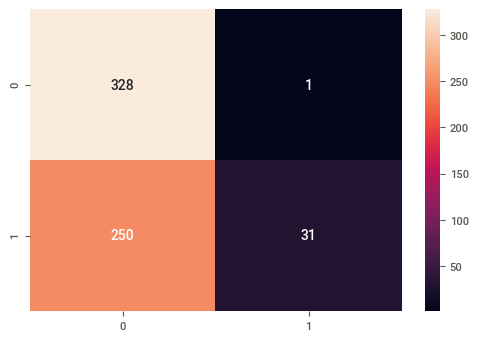

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


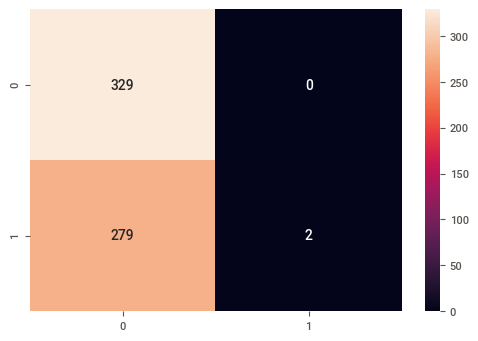

In [778]:
from sklearn import metrics,model_selection
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(train_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.4695
F1 Score 0.6332 

Confusion Matrix


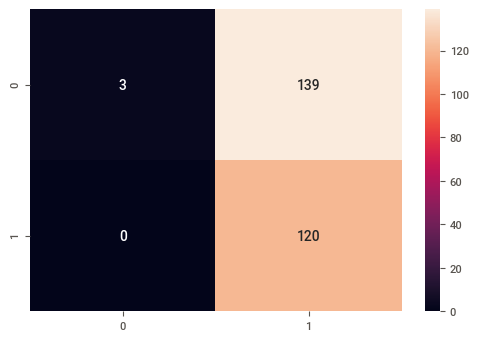

0.2 

Accuracy Score 0.5038
F1 Score 0.6448 

Confusion Matrix


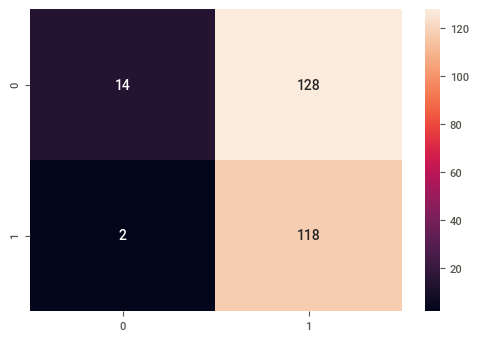

0.3 

Accuracy Score 0.5763
F1 Score 0.6606 

Confusion Matrix


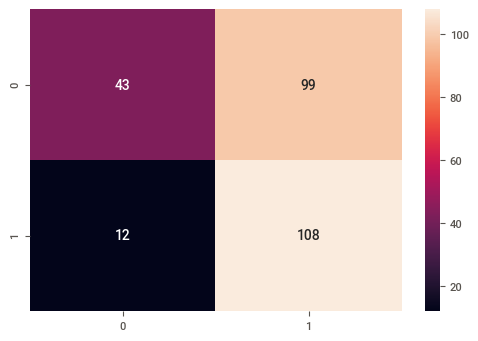

0.4 

Accuracy Score 0.645
F1 Score 0.6517 

Confusion Matrix


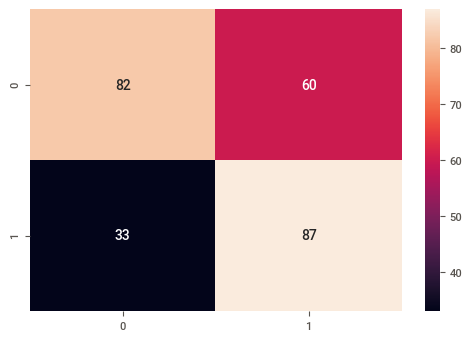

0.5 

Accuracy Score 0.6412
F1 Score 0.5566 

Confusion Matrix


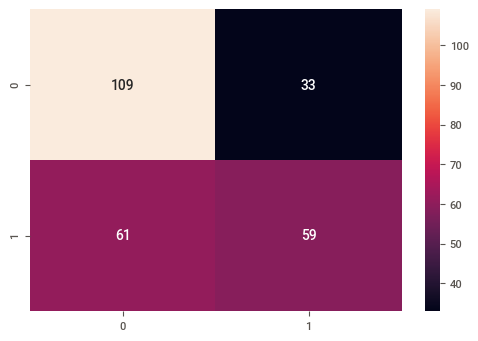

0.6 

Accuracy Score 0.6336
F1 Score 0.4894 

Confusion Matrix


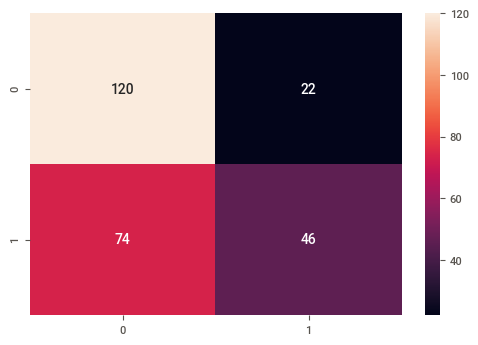

0.7 

Accuracy Score 0.5992
F1 Score 0.3137 

Confusion Matrix


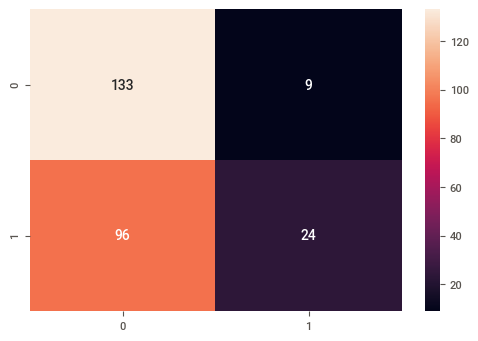

0.8 

Accuracy Score 0.5725
F1 Score 0.1515 

Confusion Matrix


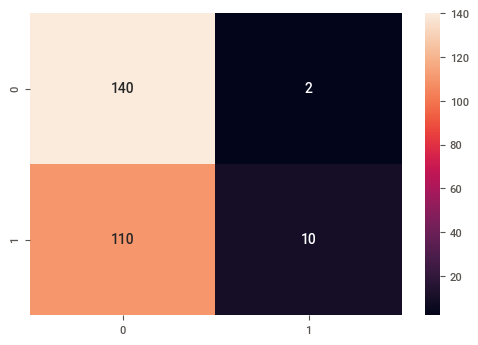

0.9 

Accuracy Score 0.5458
F1 Score 0.0165 

Confusion Matrix


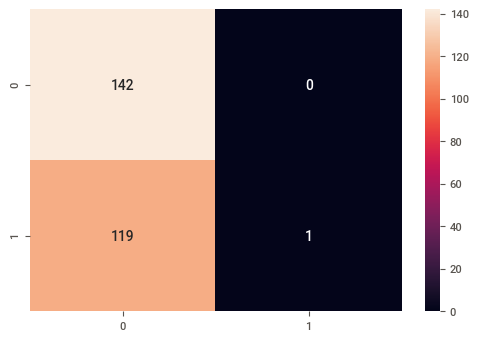

In [779]:
from sklearn import metrics,model_selection
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(test_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(test_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(test_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [780]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [781]:
accuracy_score(train_labels,ytrain_predict)

0.6639344262295082

In [782]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



In [783]:
accuracy_score(test_labels,ytest_predict)

0.6412213740458015

In [784]:
pd.Series(ytrain_predict).value_counts()

0    362
1    248
dtype: int64

In [785]:
train_labels.value_counts()

0    329
1    281
Name: Holliday_Package, dtype: int64

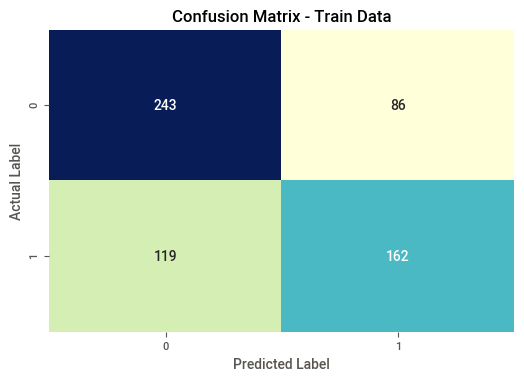

In [786]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [787]:
pd.Series(ytest_predict).value_counts()

0    170
1     92
dtype: int64

In [788]:
test_labels.value_counts()

0    142
1    120
Name: Holliday_Package, dtype: int64

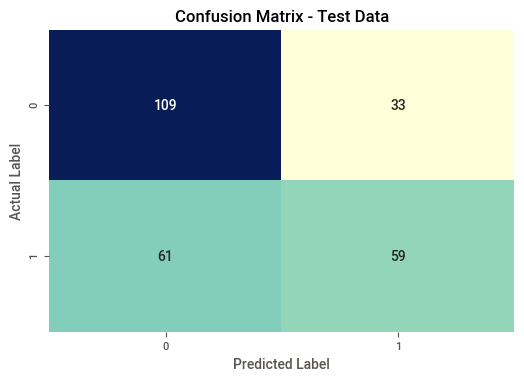

In [789]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()


AUC: 0.735


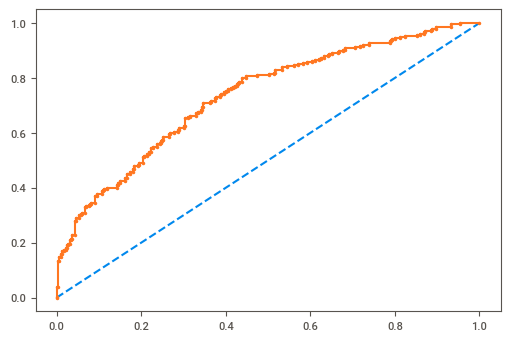

In [790]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.718


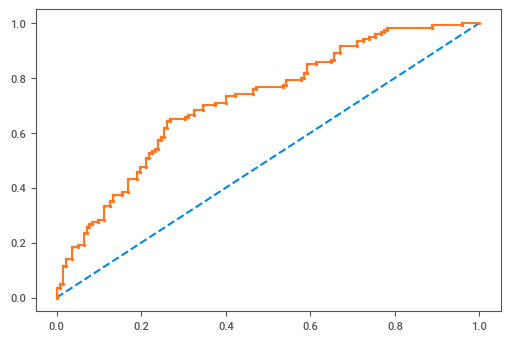

In [791]:
# AUC and ROC for the testing data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Comparing Logistic Regression and LDA

In [792]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Test':[0.6603,0.718,0.53,0.66,0.59],
        'LR Train':[0.6672,0.735,0.57,0.66,0.61],
       'LDA Test':[0.6412,0.718,0.49,0.64,0.56],
        'LDA Train':[0.6639,0.735,0.58,0.65,0.61]}
                    ,index=index)
round(data,2)

LR Test  LR Train  LDA Test  LDA Train
Accuracy      0.66      0.67      0.64       0.66
AUC           0.72      0.74      0.72       0.74
Recall        0.53      0.57      0.49       0.58
Precision     0.66      0.66      0.64       0.65
F1 Score      0.59      0.61      0.56       0.61

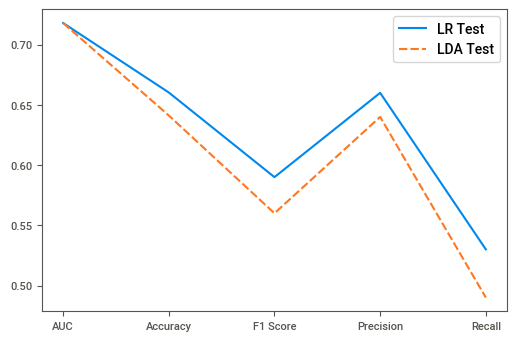

In [793]:
sns.lineplot(data=data.T[0::2].T)

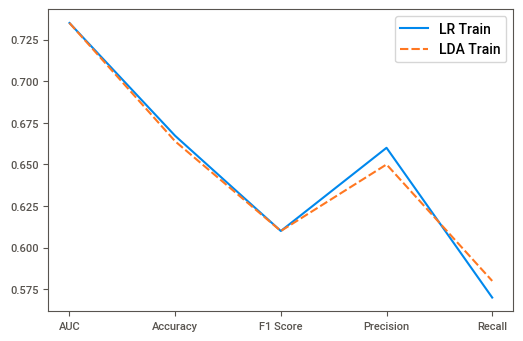

In [798]:
sns.lineplot(data=data.T[1::2].T)

## Logistic regression is the better more optimized model of the two.

# Thank You!